First we need to make sure that all parameters are set correctly, otherwise the code below won't run properly. Therefore please open https://cloud.ibm.com/iam/users and login if necessary. Please copy the email shown on your screen and paste it to the cell below where you find ###YOUR_CODE_HERE###. Please then click on your user name:

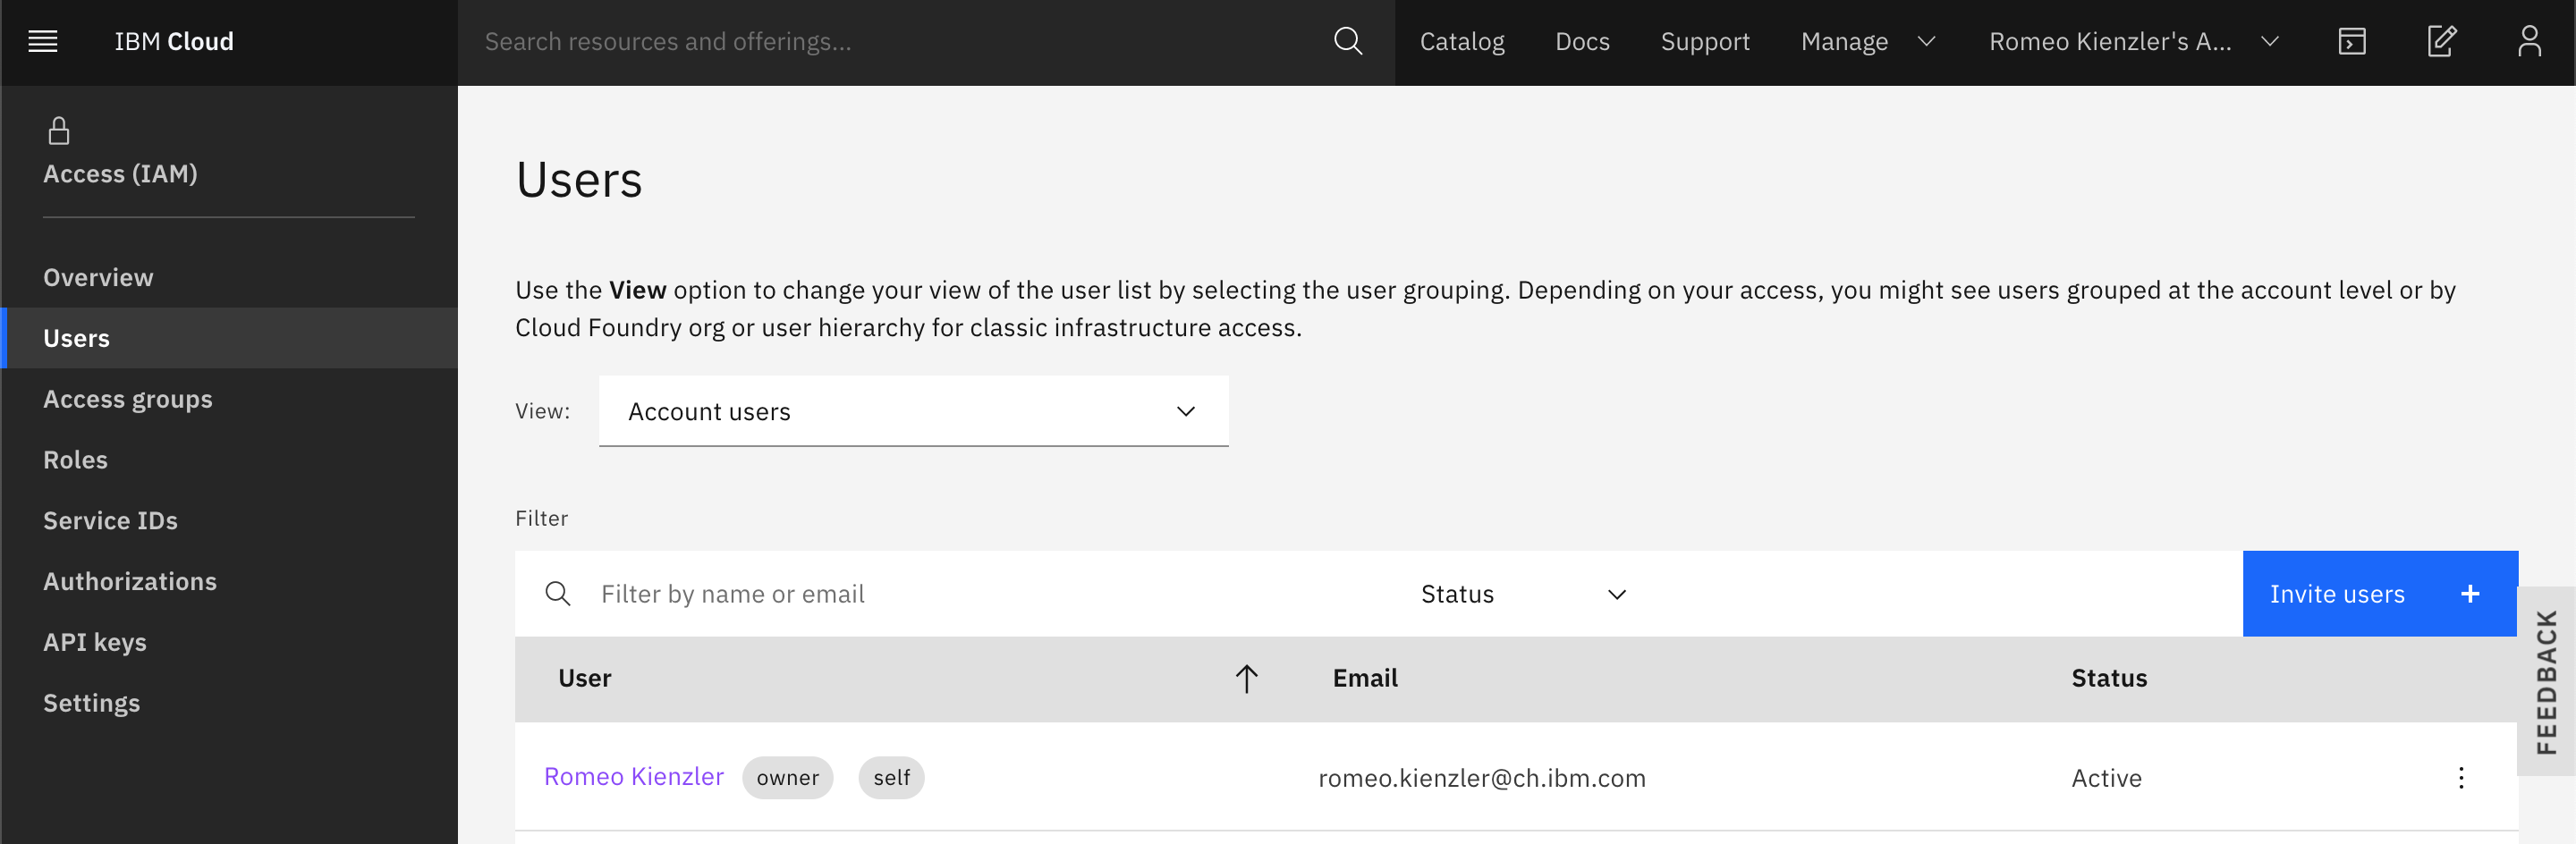





In [31]:
%%bash
email="###YOUR_CODE_HERE###"

echo $email > account

Then, please click on the "CloudFoundry" tab and expand. Please enter the "organization", "space" and "region" into the cell below and replace ###YOUR_CODE_HERE###.


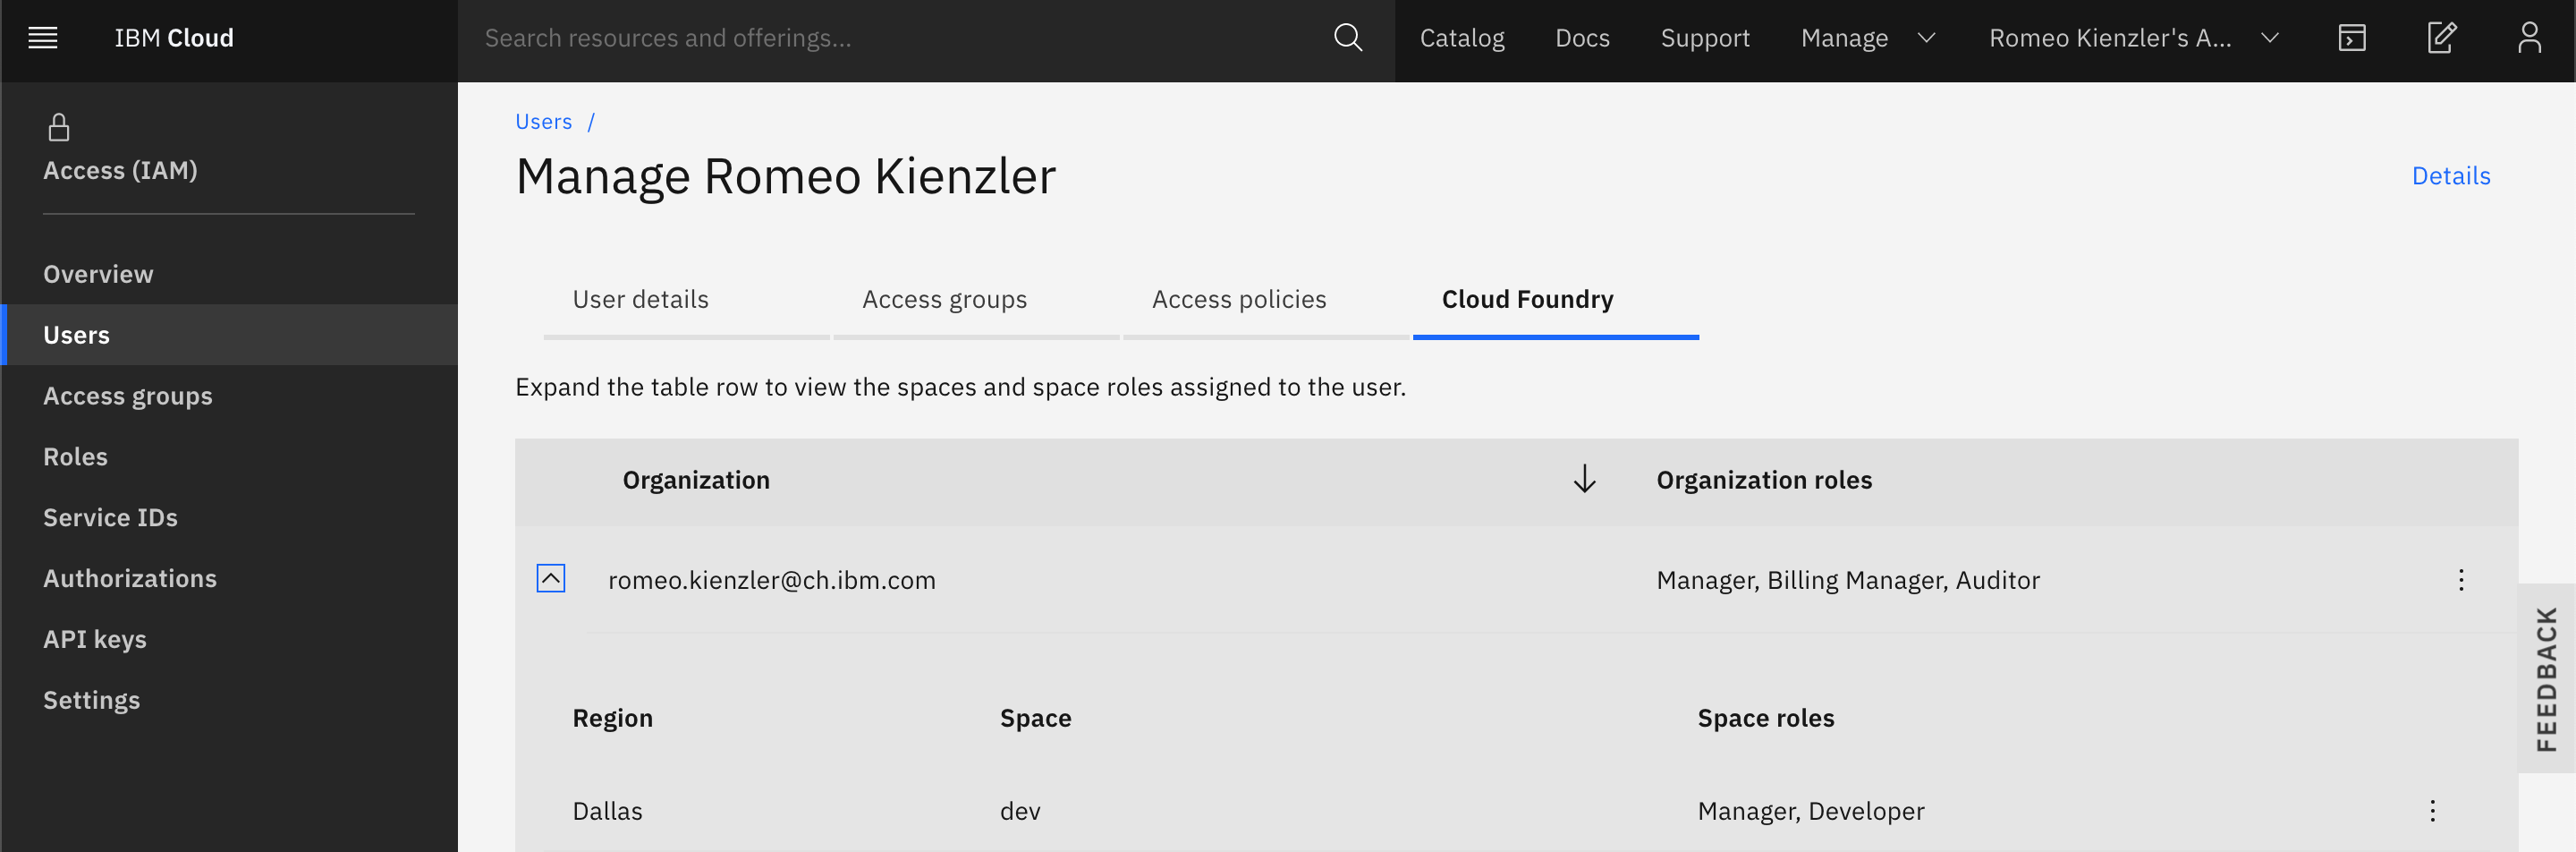

IMPORTANT: For region you are not allowed to use the name, you need to put the code. So for examle "Dallas" maps to "us-south". You can find a mapping here and below: https://cloud.ibm.com/docs/containers?topic=containers-regions-and-zones (please use "Deprecated Region")

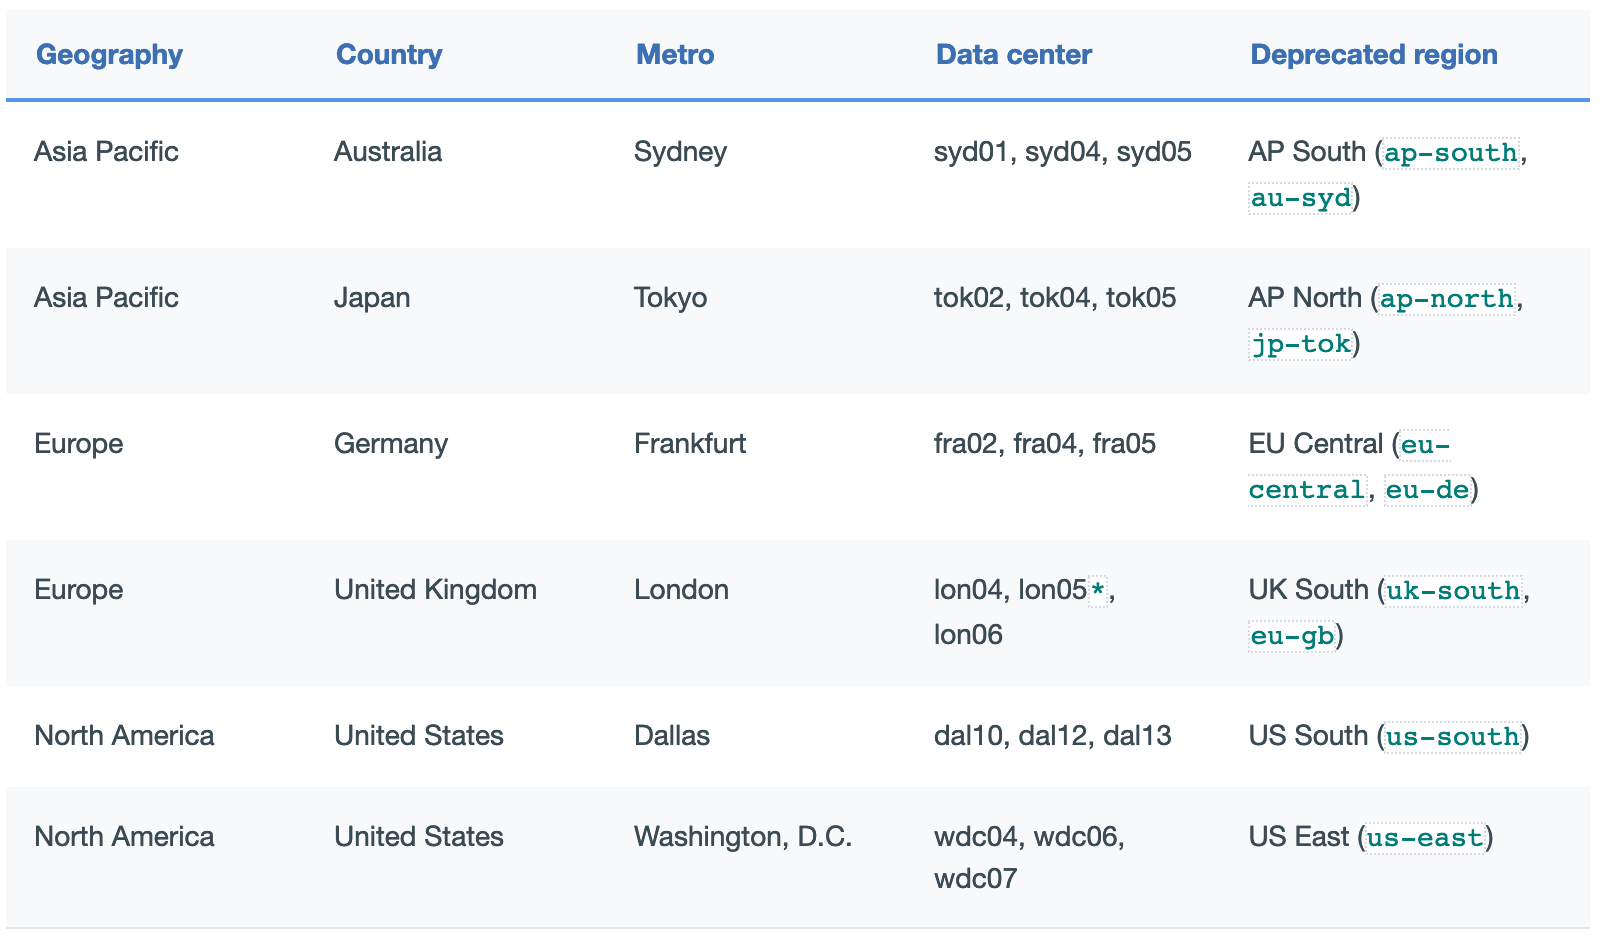

In [46]:
%%bash

region="###YOUR_CODE_HERE###"
organization="###YOUR_CODE_HERE###"
space="###YOUR_CODE_HERE###"



echo $region > region
echo $organization > organization
echo $space > space


Please create an API key using the following link: https://cloud.ibm.com/iam/apikeys

Please click on the "Create an IBM Cloud API key" button. Please fill in a name, then click on create:

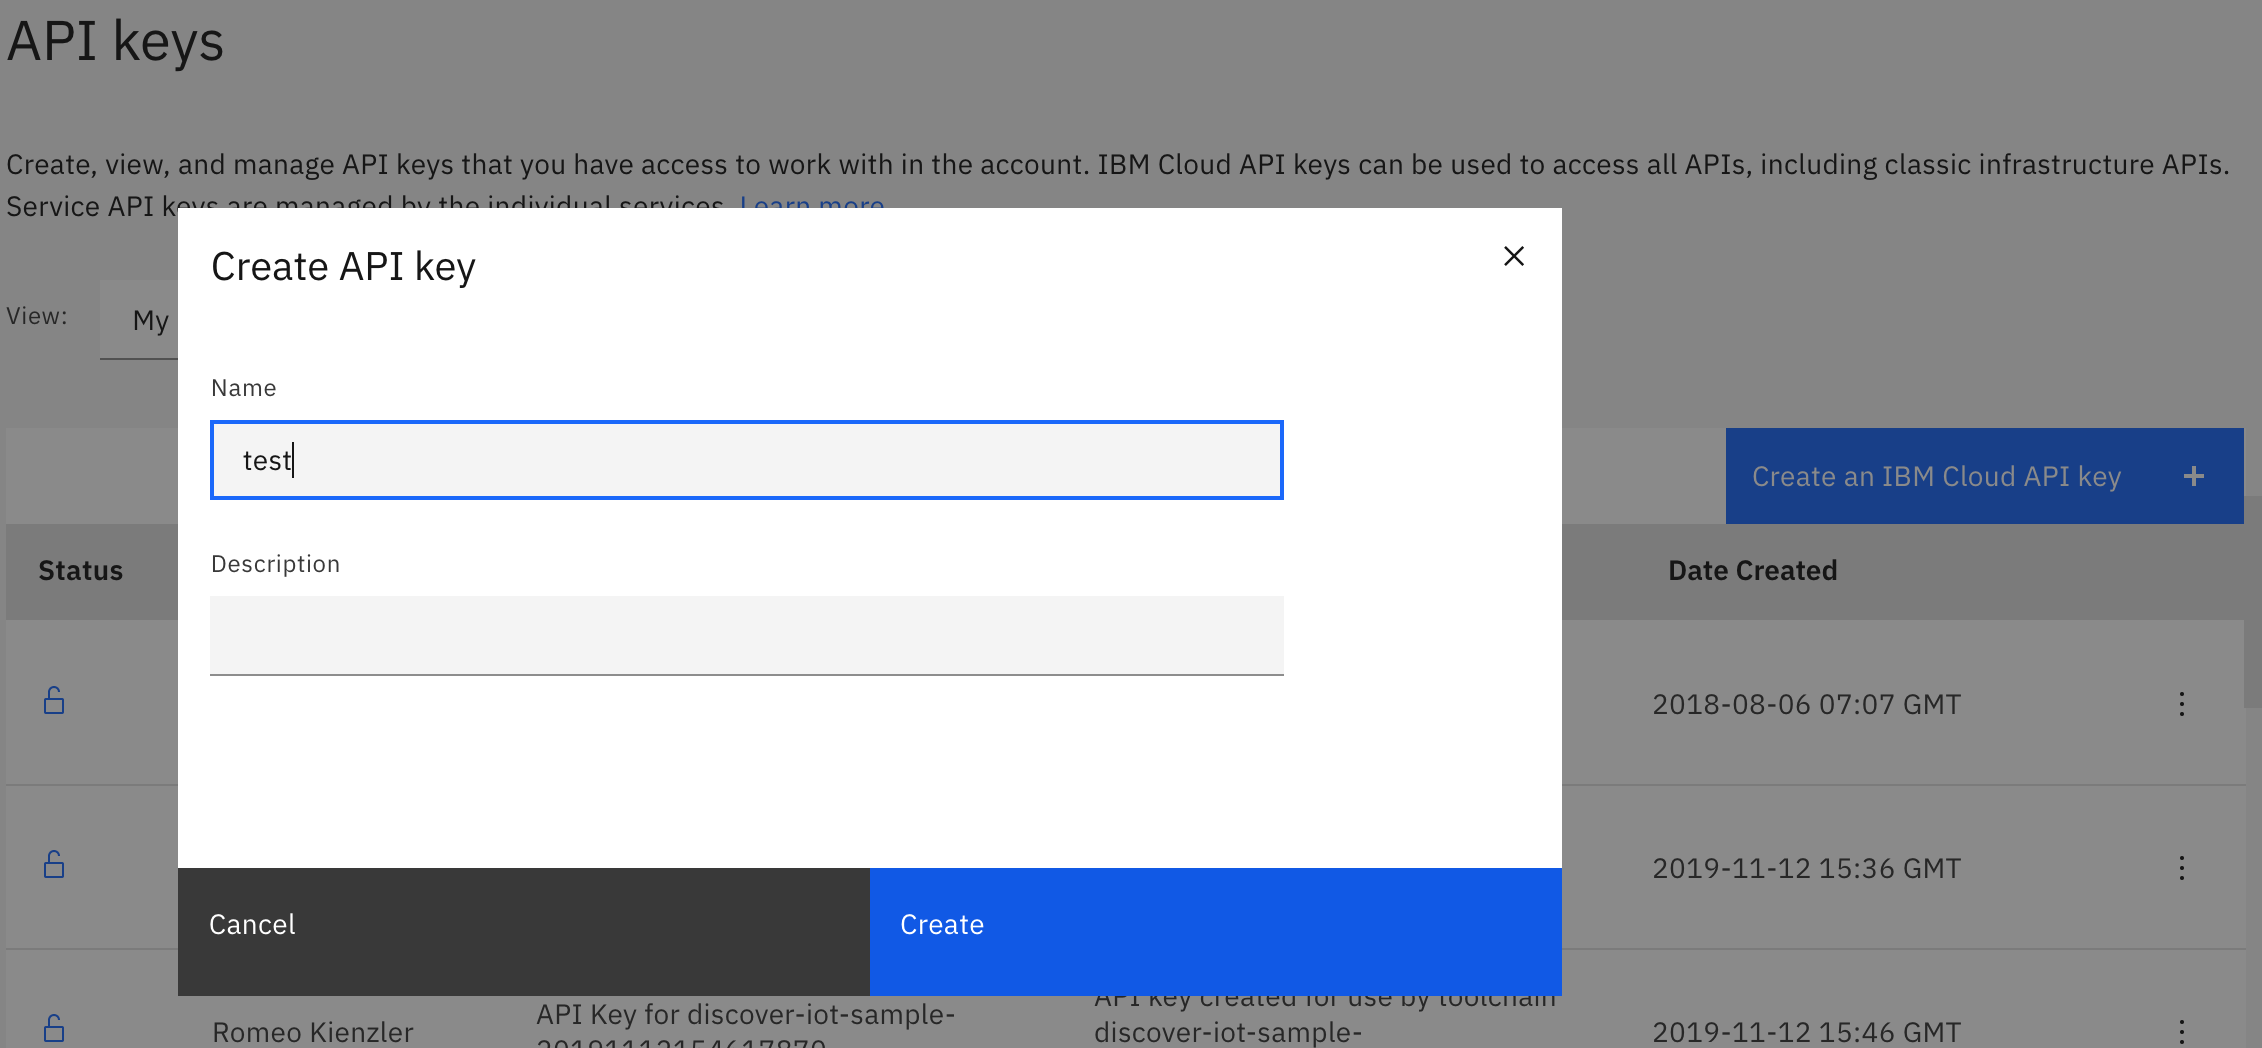

Please copy the api key and paste it into the cell below by replacing ###YOUR_CODE_HERE###

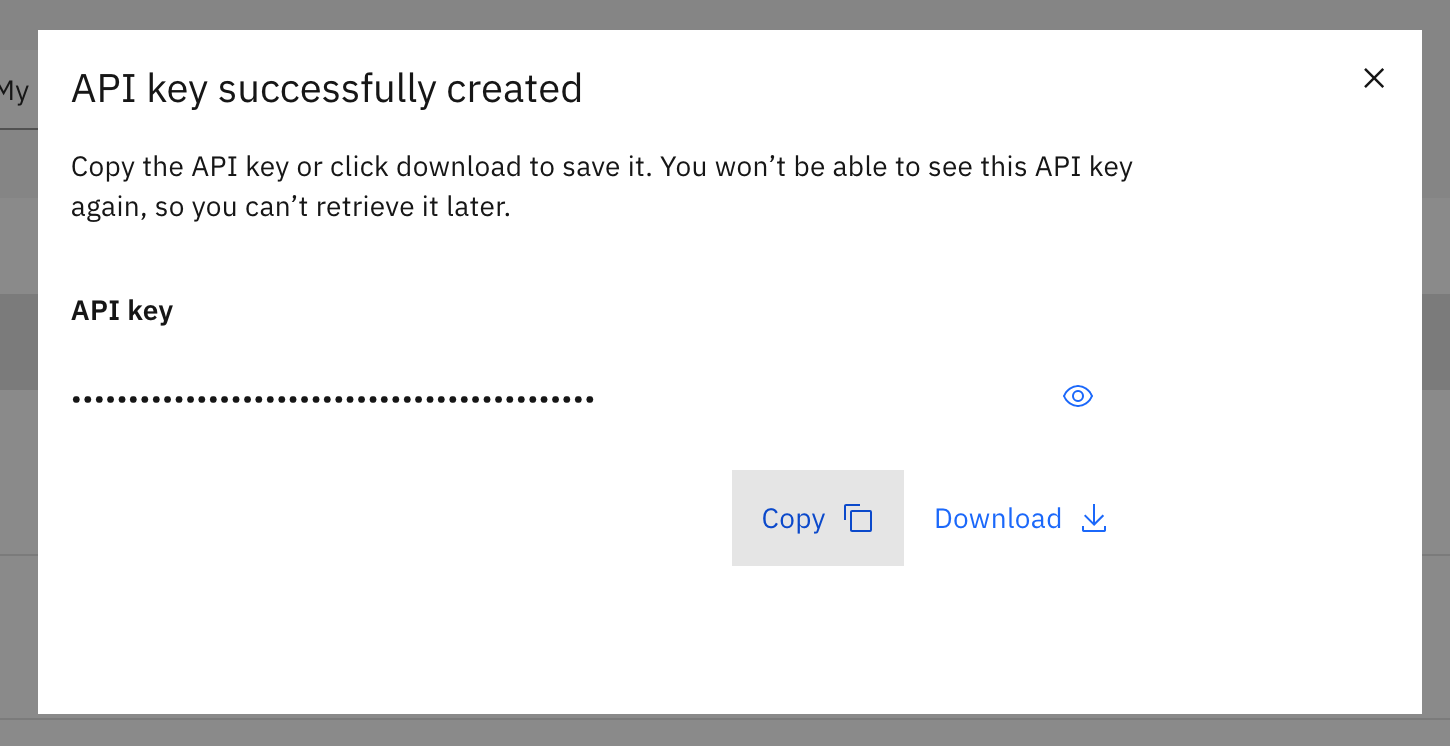

In [47]:
%%bash
apikey="###YOUR_CODE_HERE###"


echo $apikey > apikey

Now it's time to create a bucket in your S3 Cloud Object store for retrieving training data or storing models. Open the following URL: https://dataplatform.cloud.ibm.com/projects?context=wdp. Then, please click on your project and then click on the "Settings" tab.

Under "Storage", please click on "Manage in IBM Cloud":
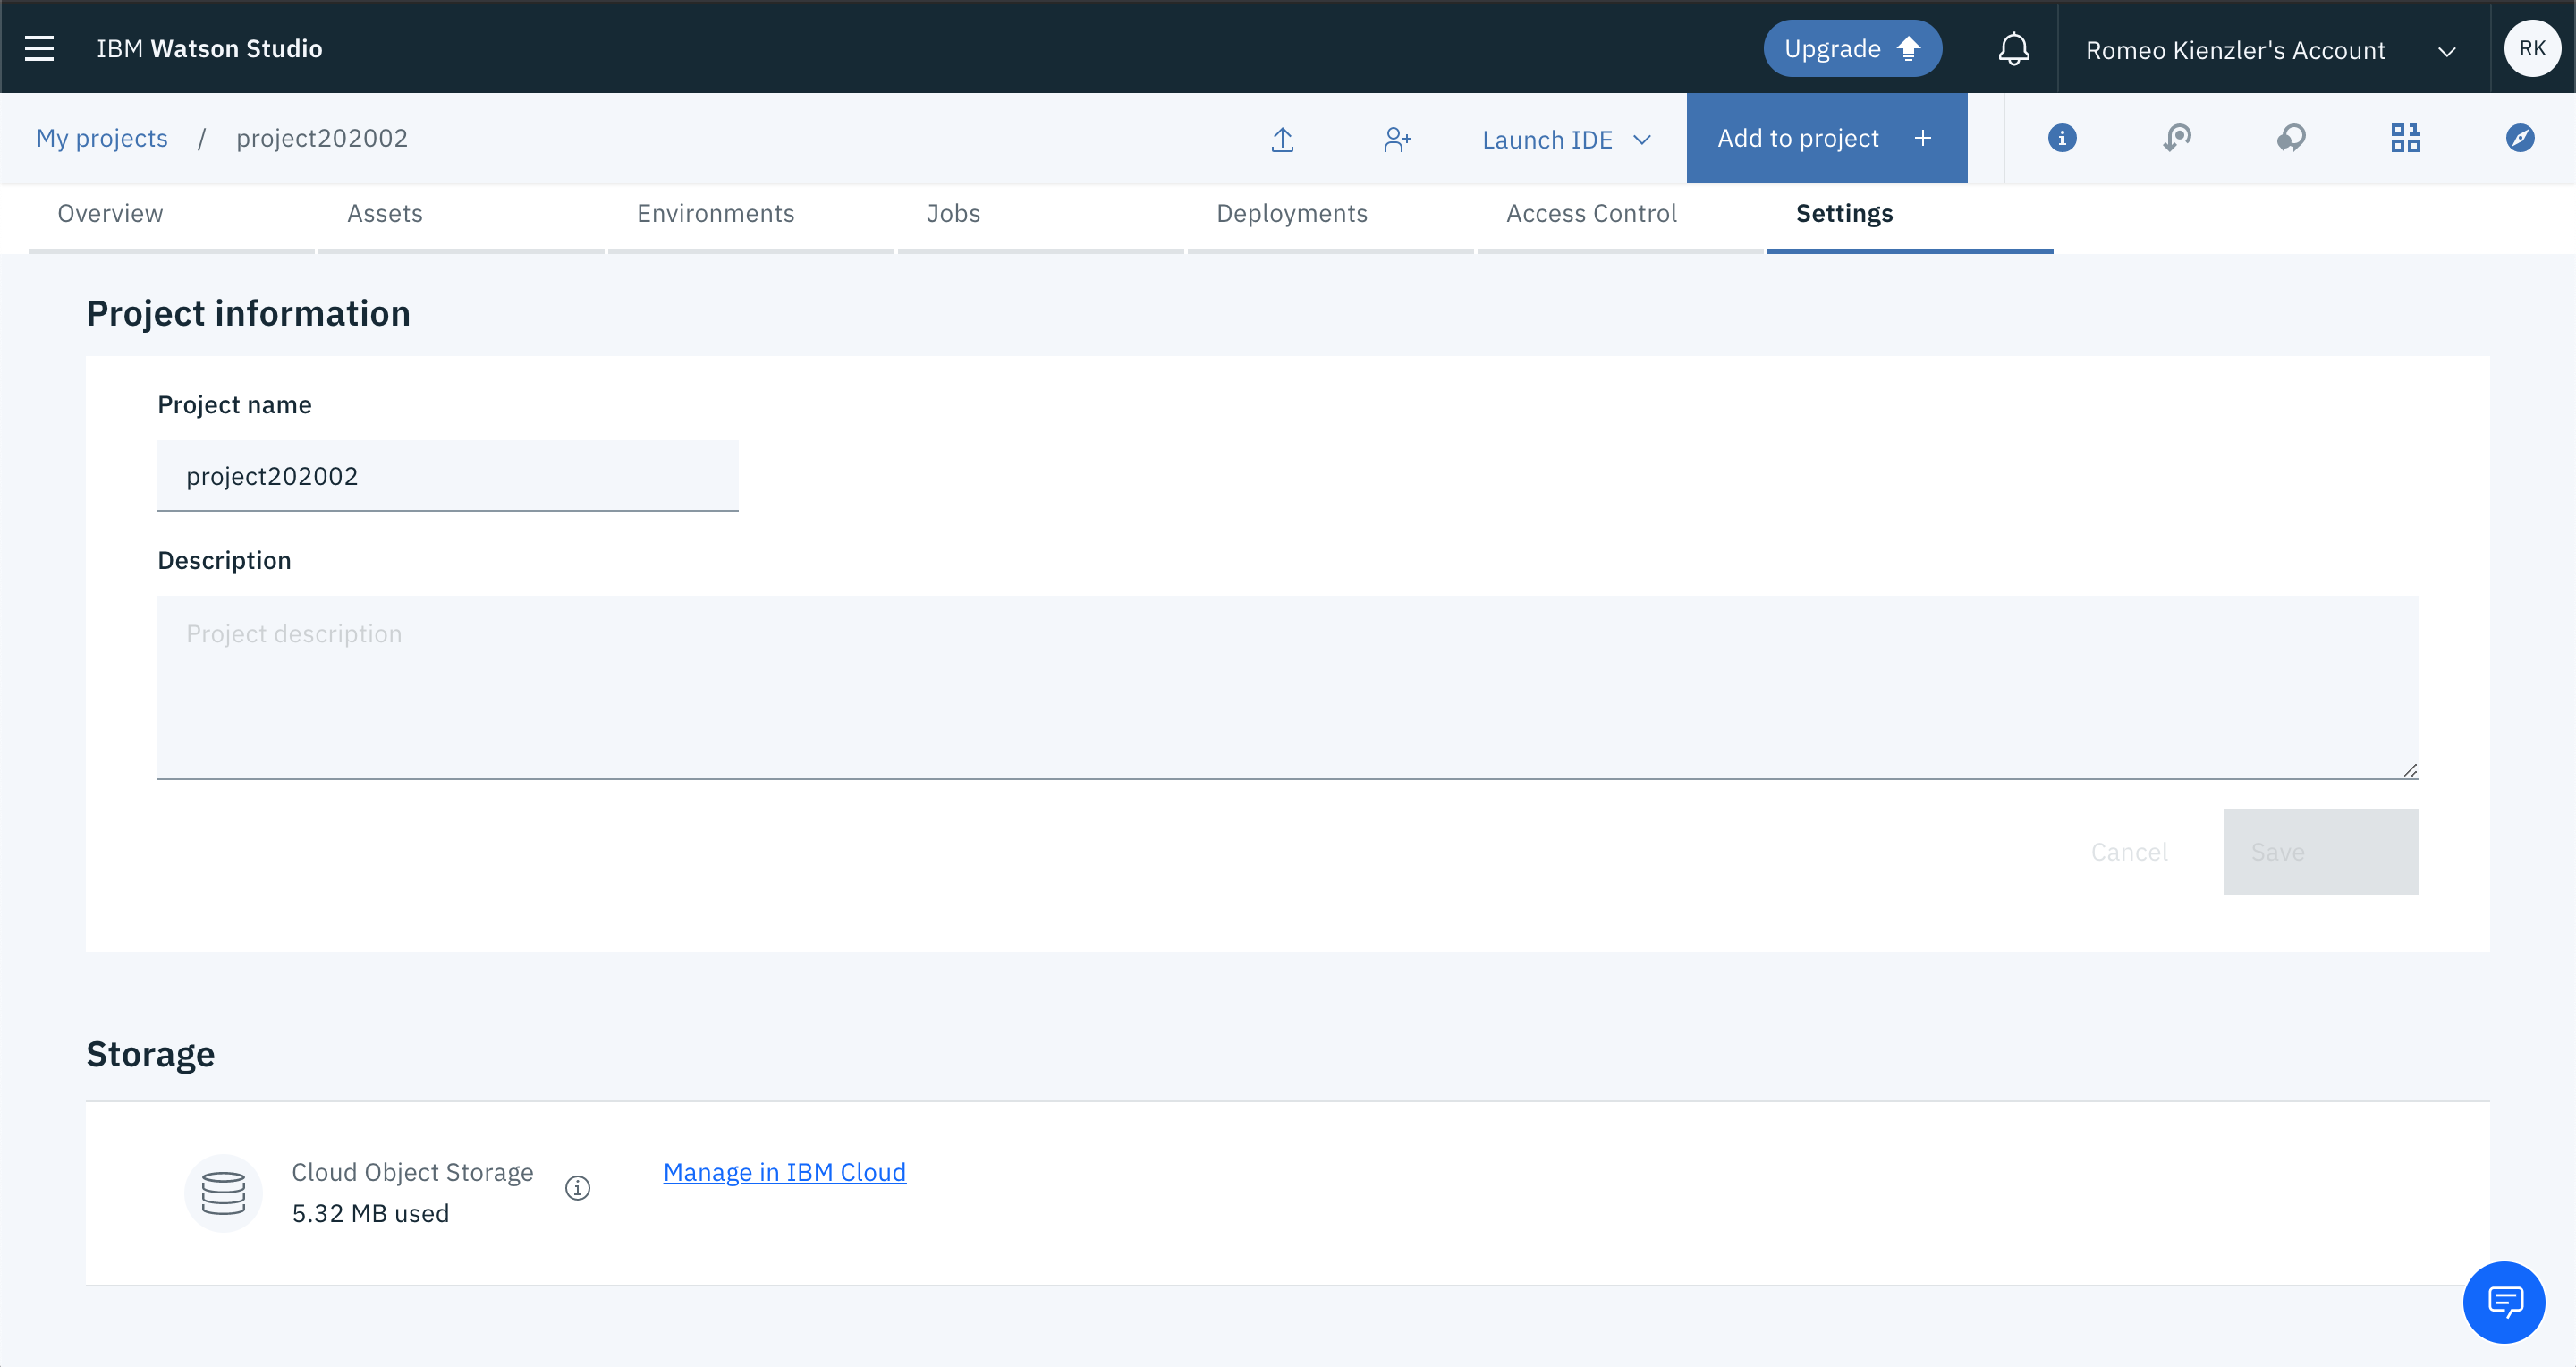

You are taken to the S3 Cloud Object Storage admin interface of IBM Cloud .Please click on the "Create" button to create a new bucket for your data:
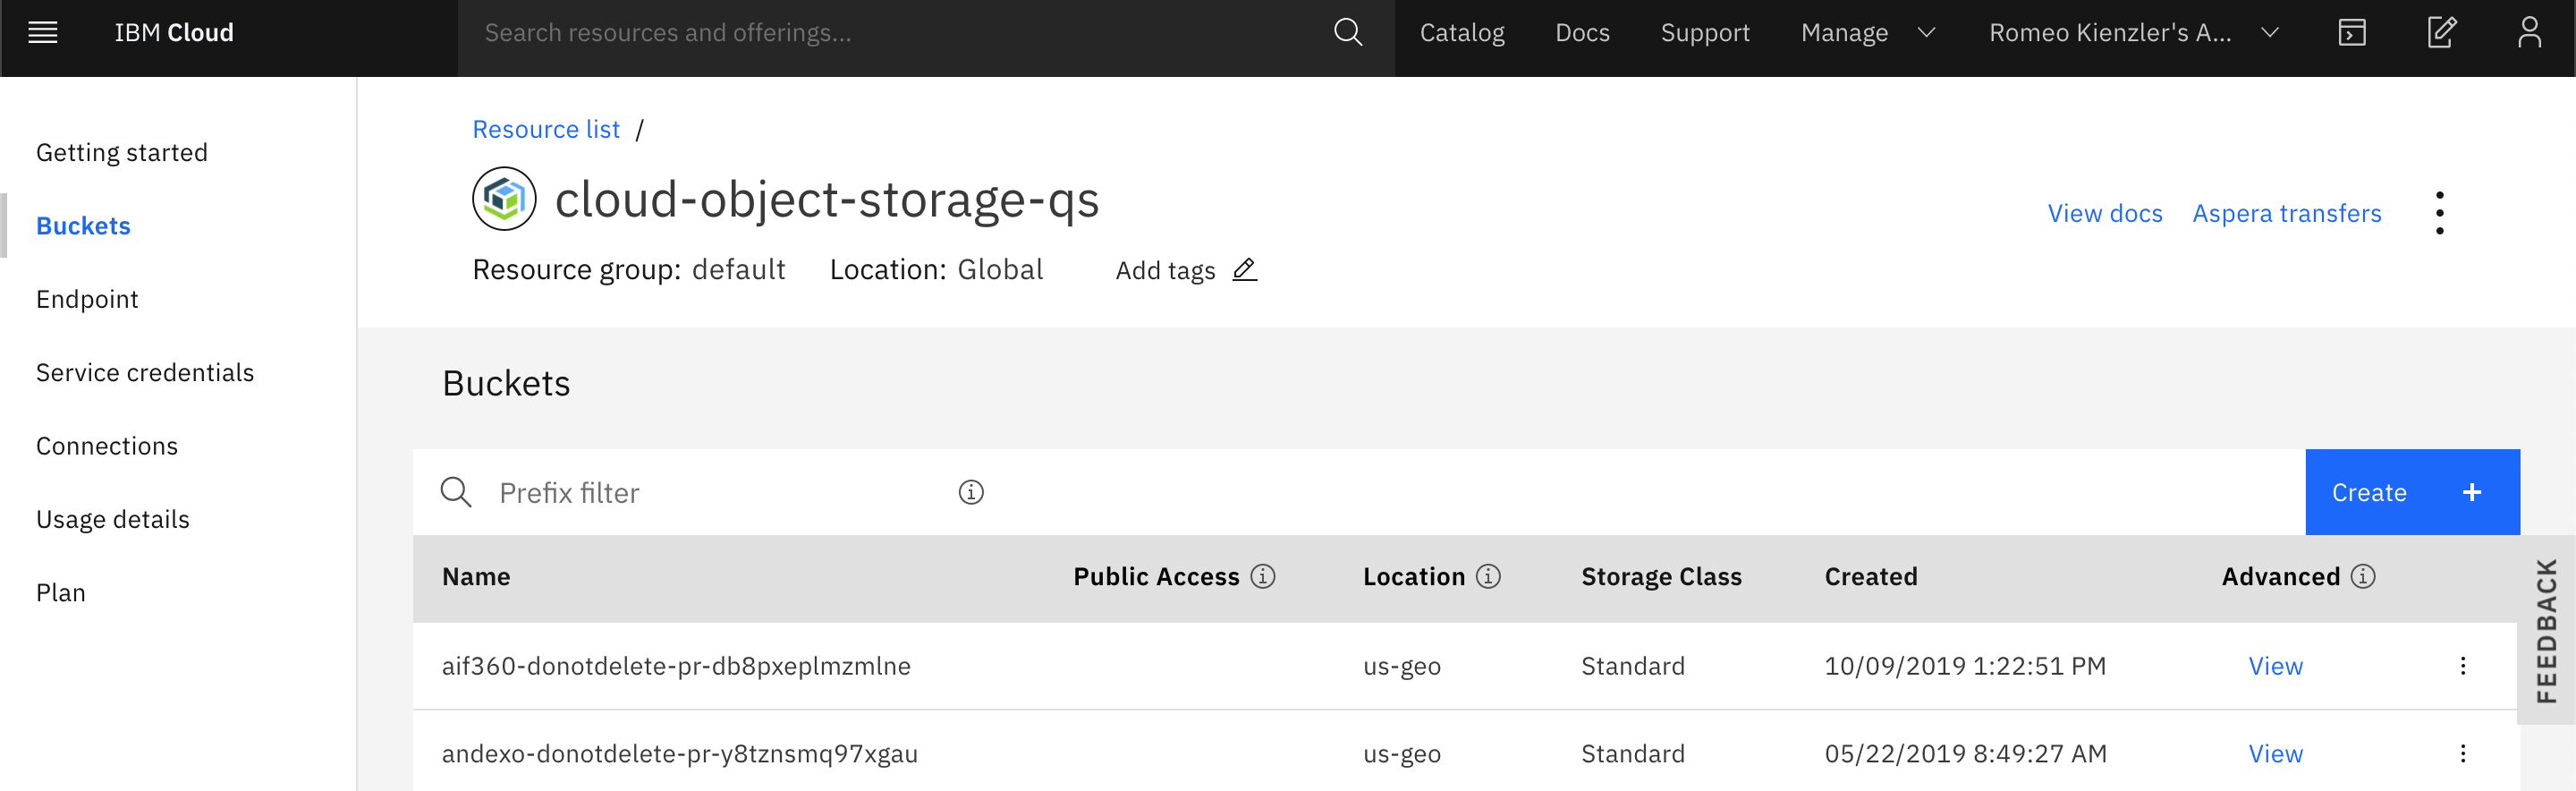
Please enter the bucket name into the code below by replacing  ###YOUR_CODE_HERE###. Please make sure to execute the cell below as well.

In [1]:
%%bash
s3_bucket="###YOUR_CODE_HERE###"

echo $s3_bucket > s3_bucket

Please then click on "Standard" and after that, please enter a unique name for your bucket and please remember that name:
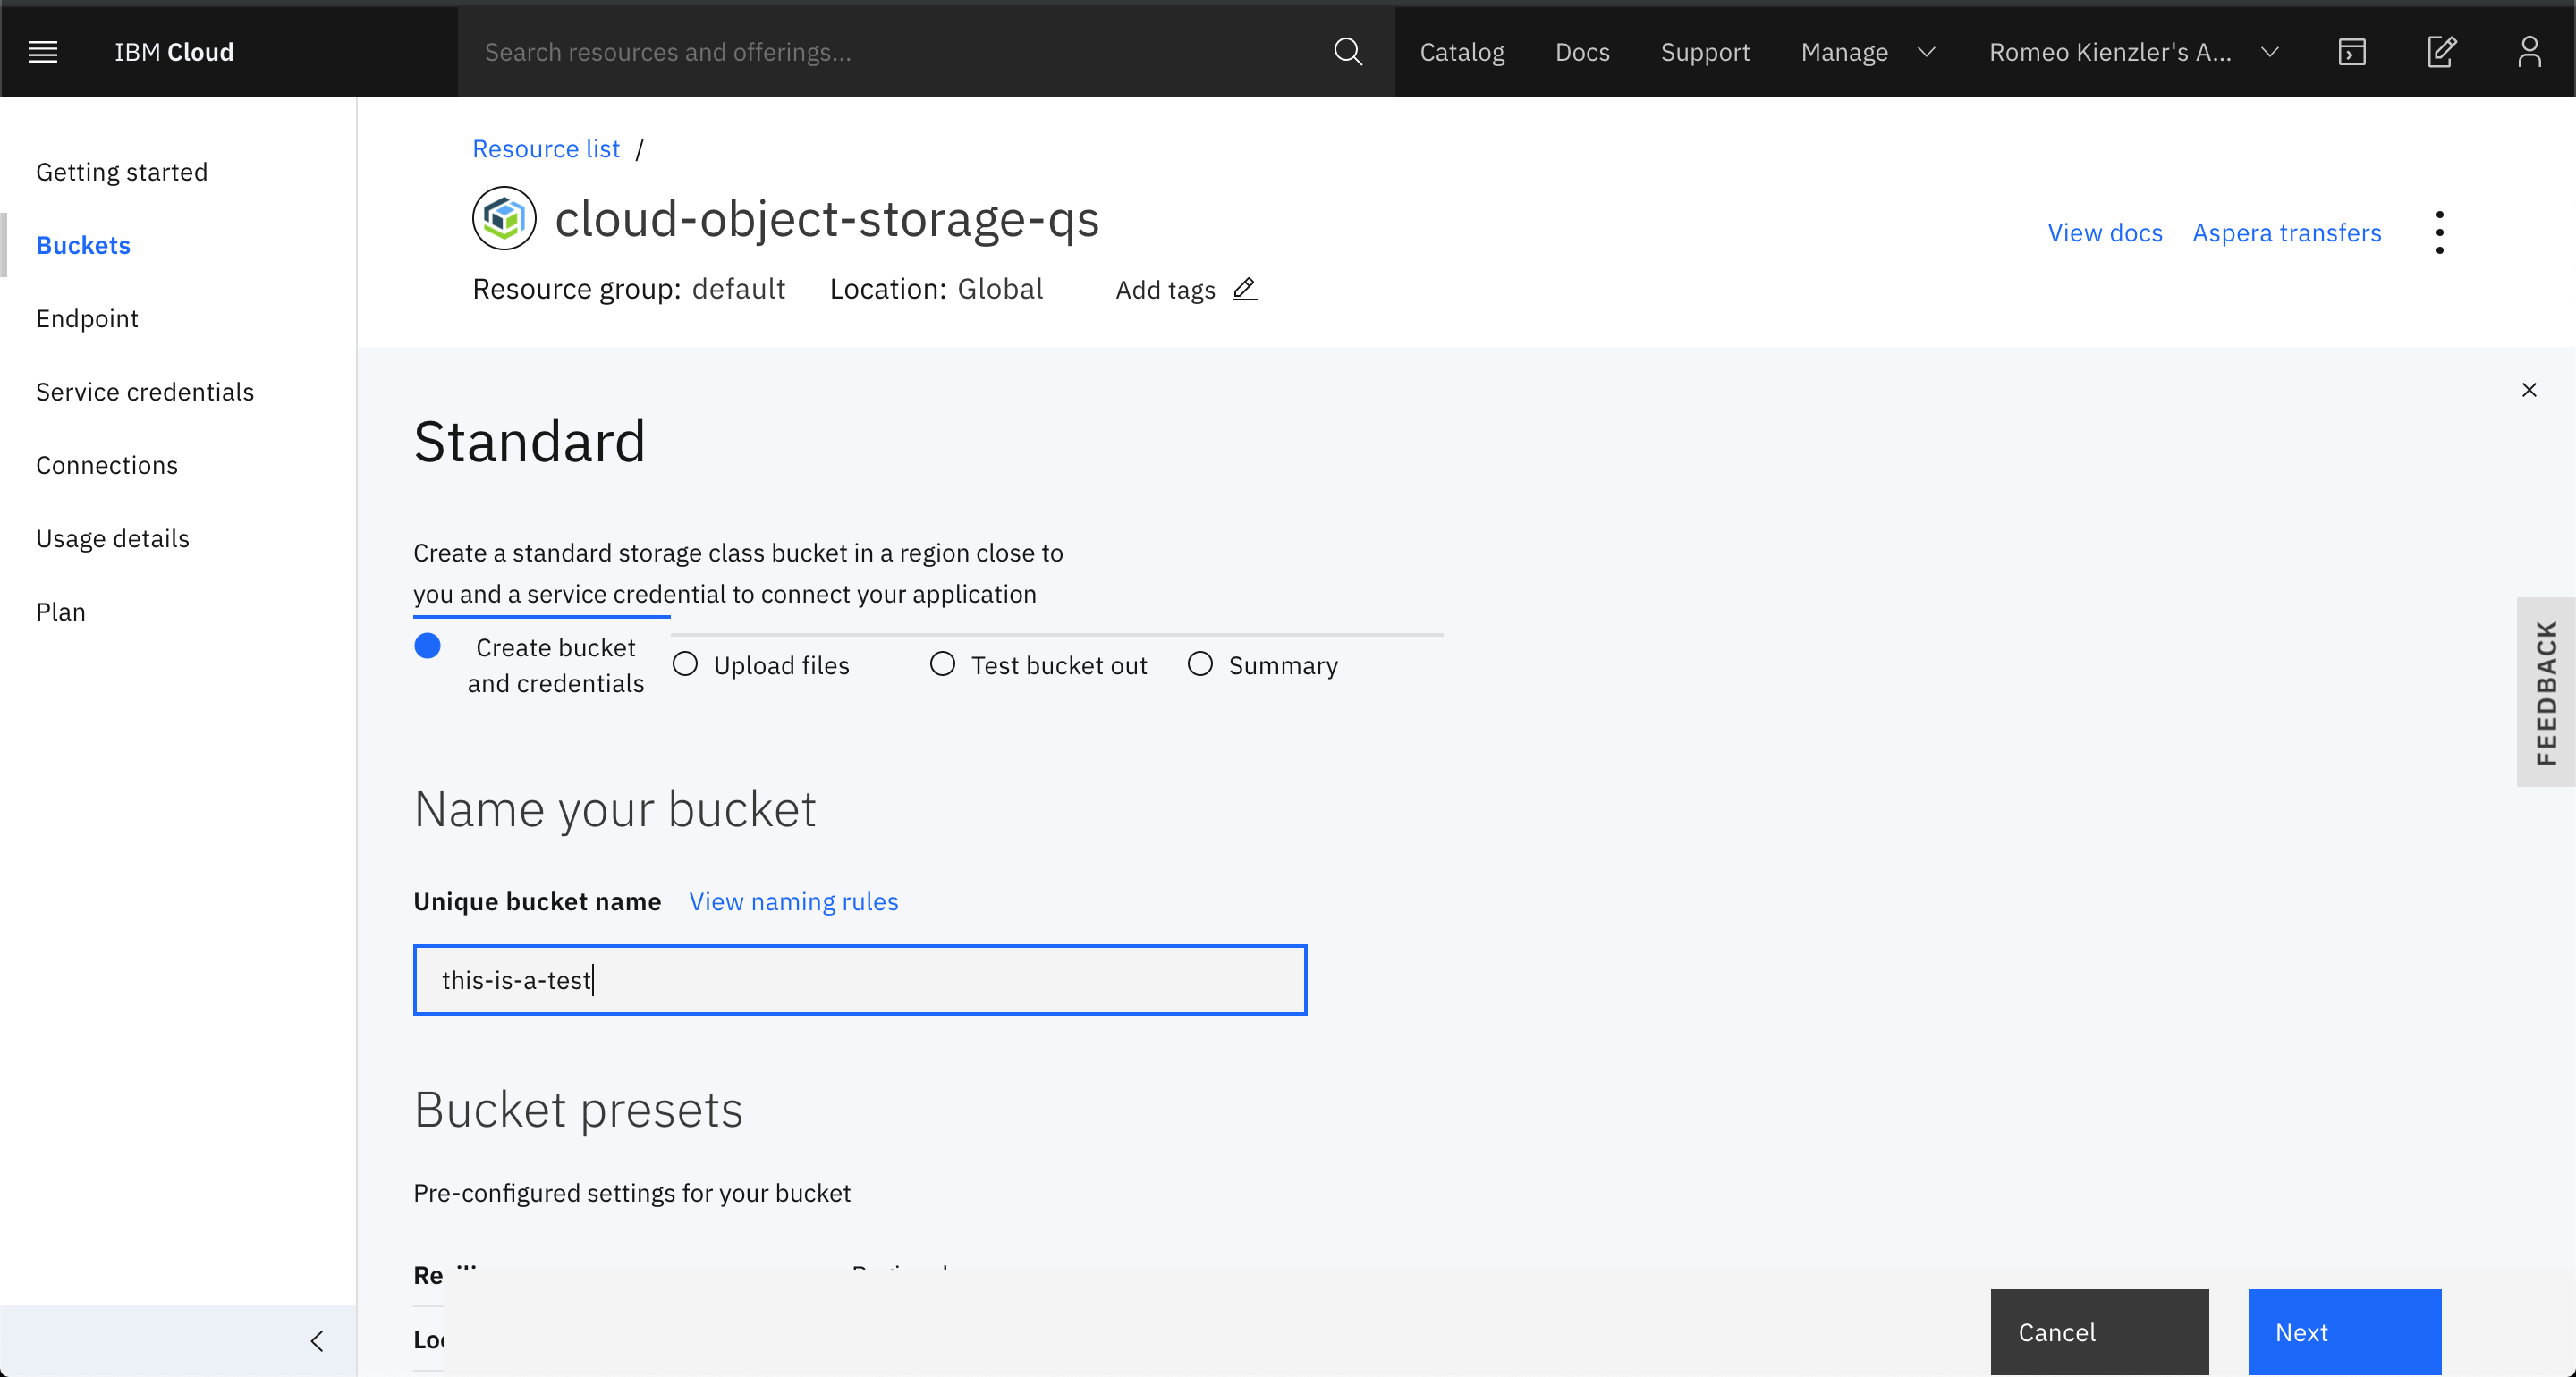
Then please click three times on "Next", until your bucket got created.

Now please scroll down the page you're shown after the bucket has been created and copy the public endpoint shown below to the cell below by replacing ###YOUR_CODE_HERE###

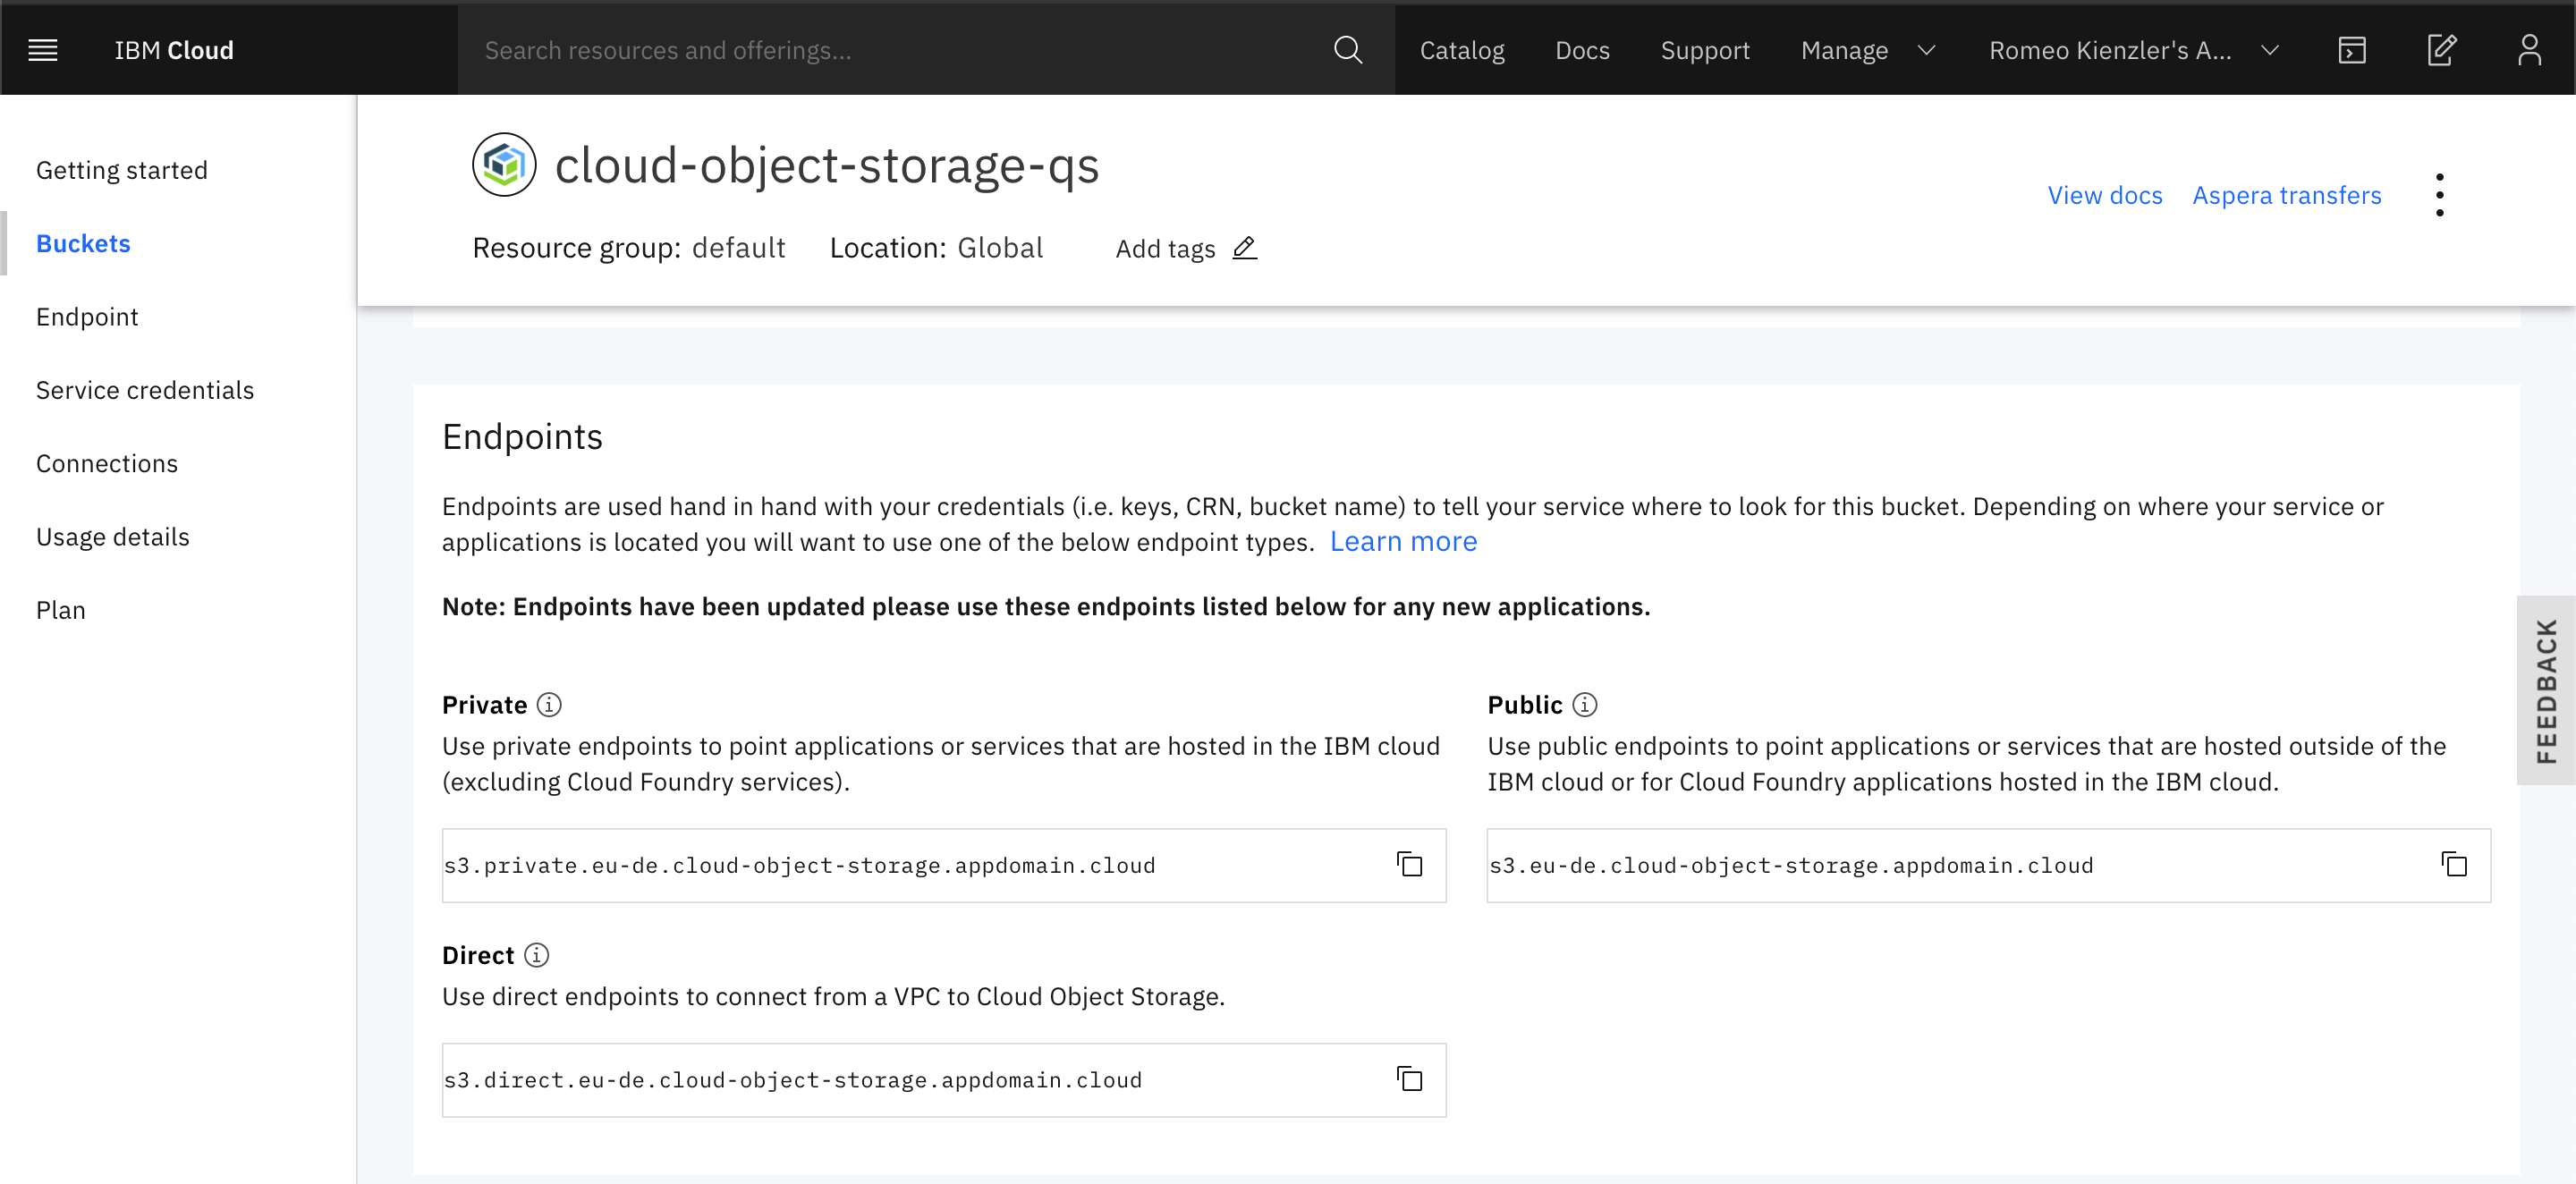

Please don't forget to execute the cell below as well.

In [48]:
%%bash
s3_endpoint_url="###YOUR_CODE_HERE###"

echo $s3_endpoint_url > s3_endpoint_url

Finally, please click on the "Service credential" tab on the left hand side, then click on "New credential". Give it a name and PLEASE DON'T forget to tick the box "Include HMAC credential":

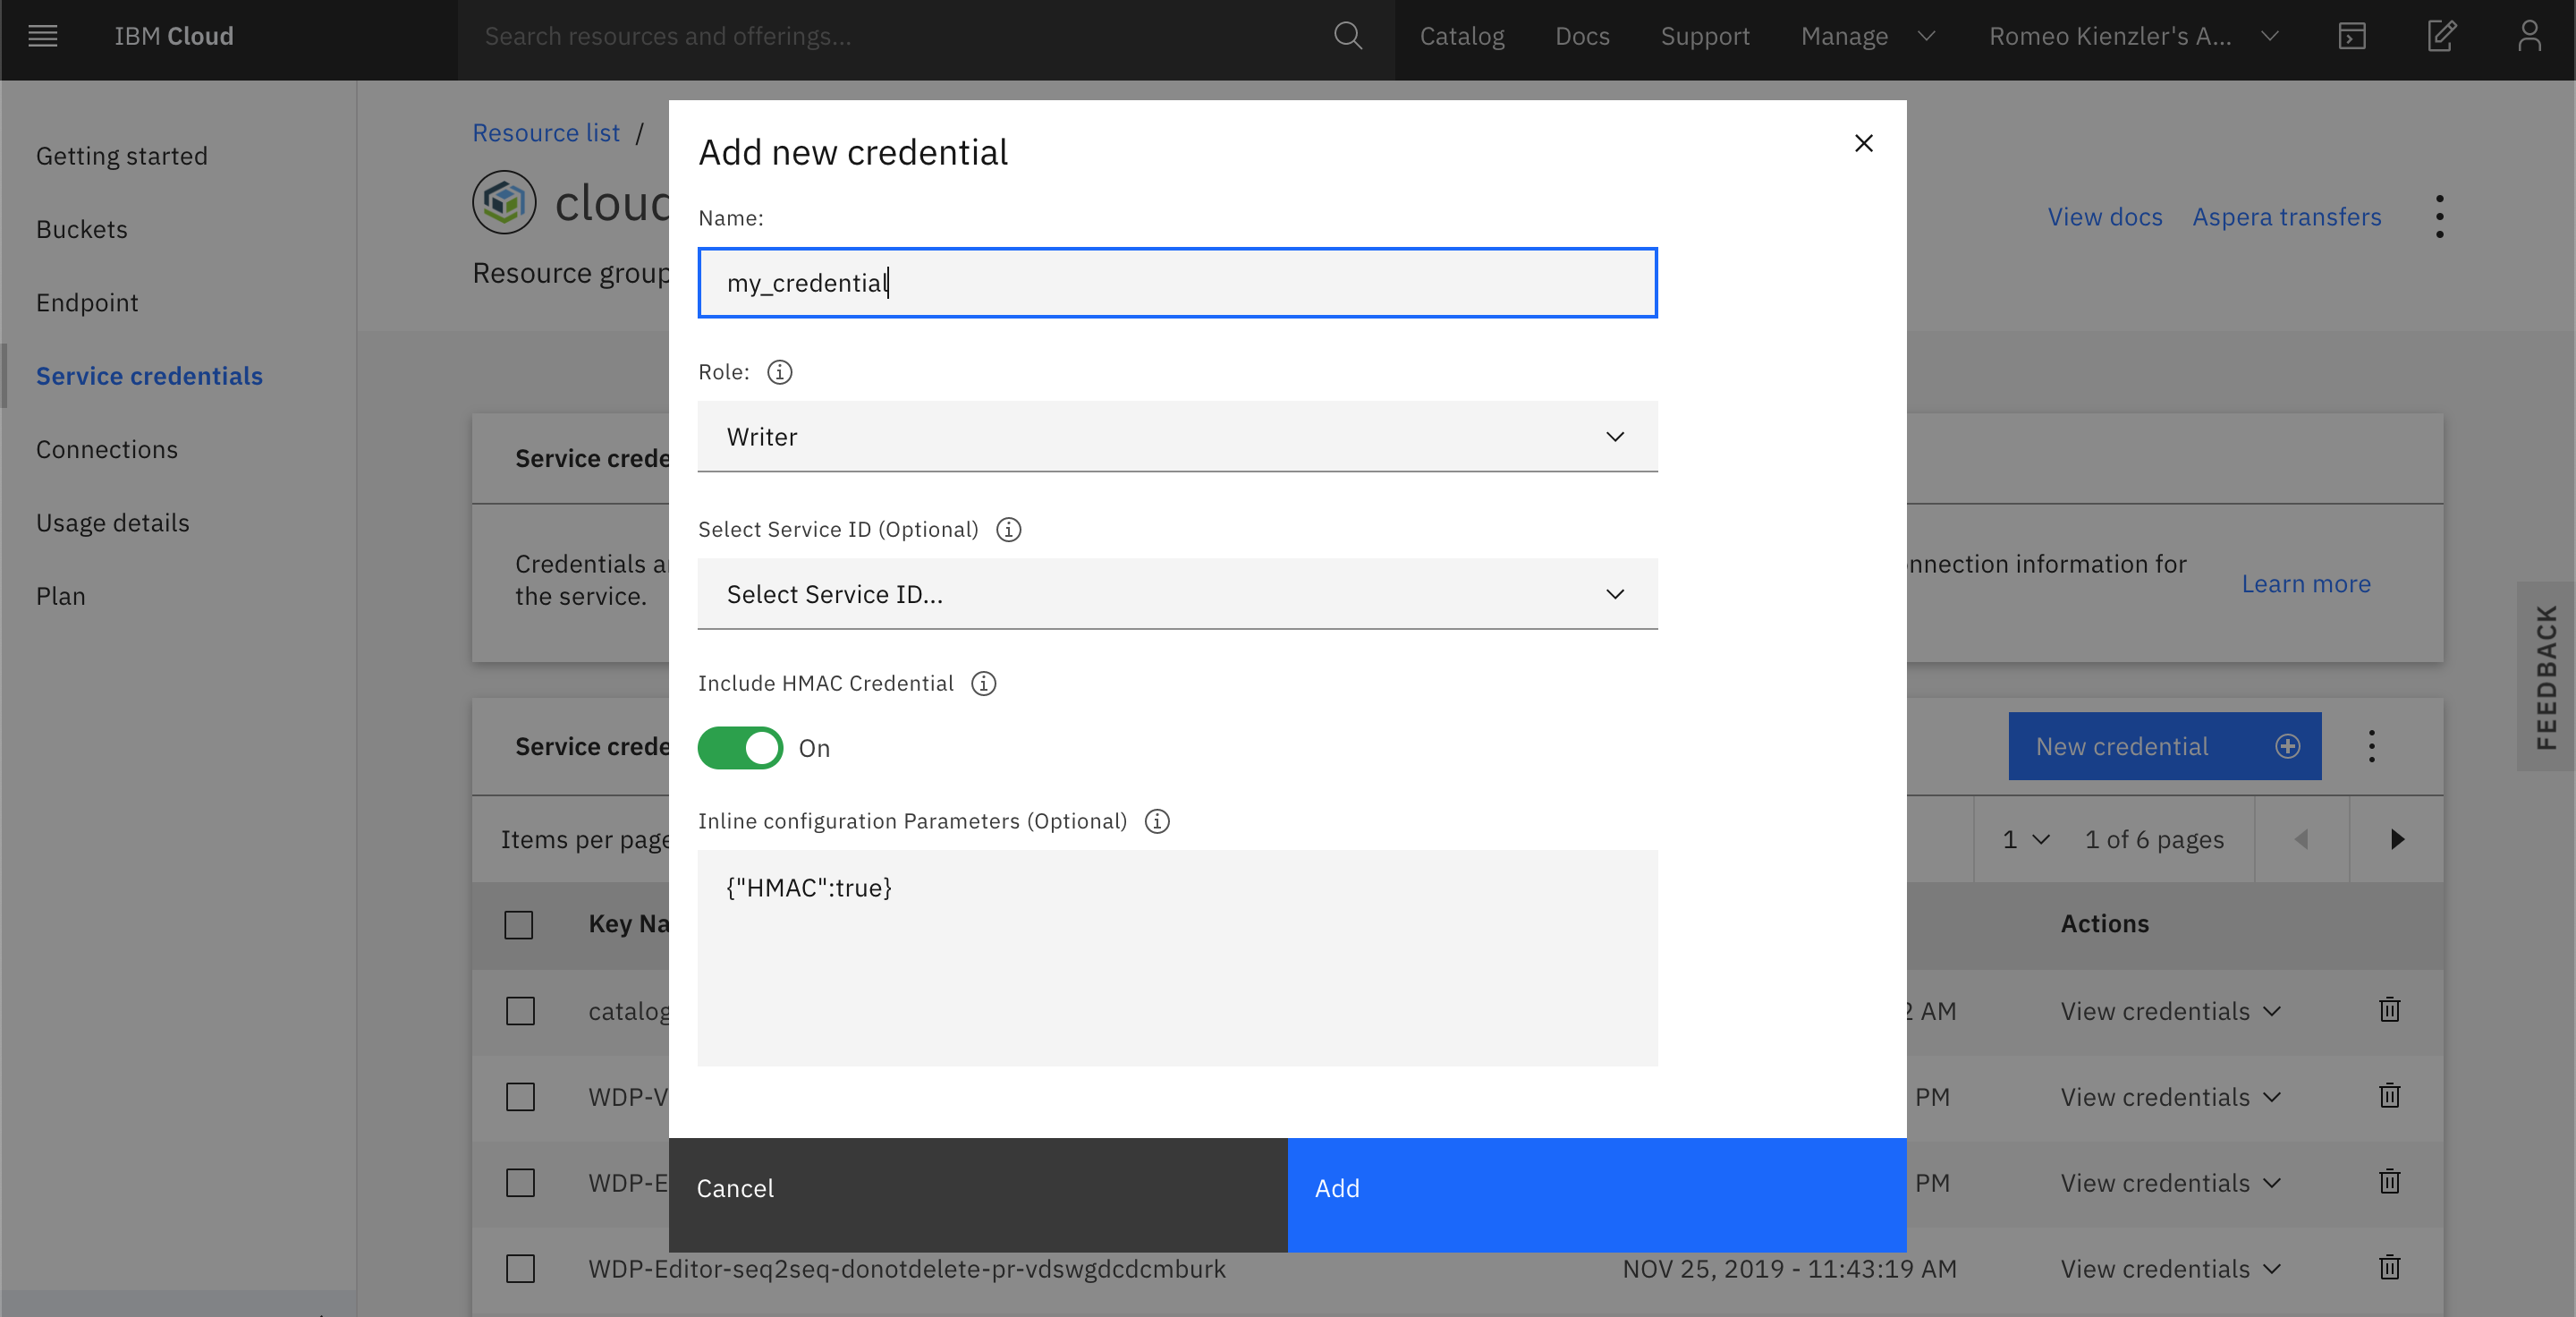



Now please find your newly created credential from the list below, expand it and please copy the access_key_id and secret_access_key to the placeholders in the cell below and execute it:

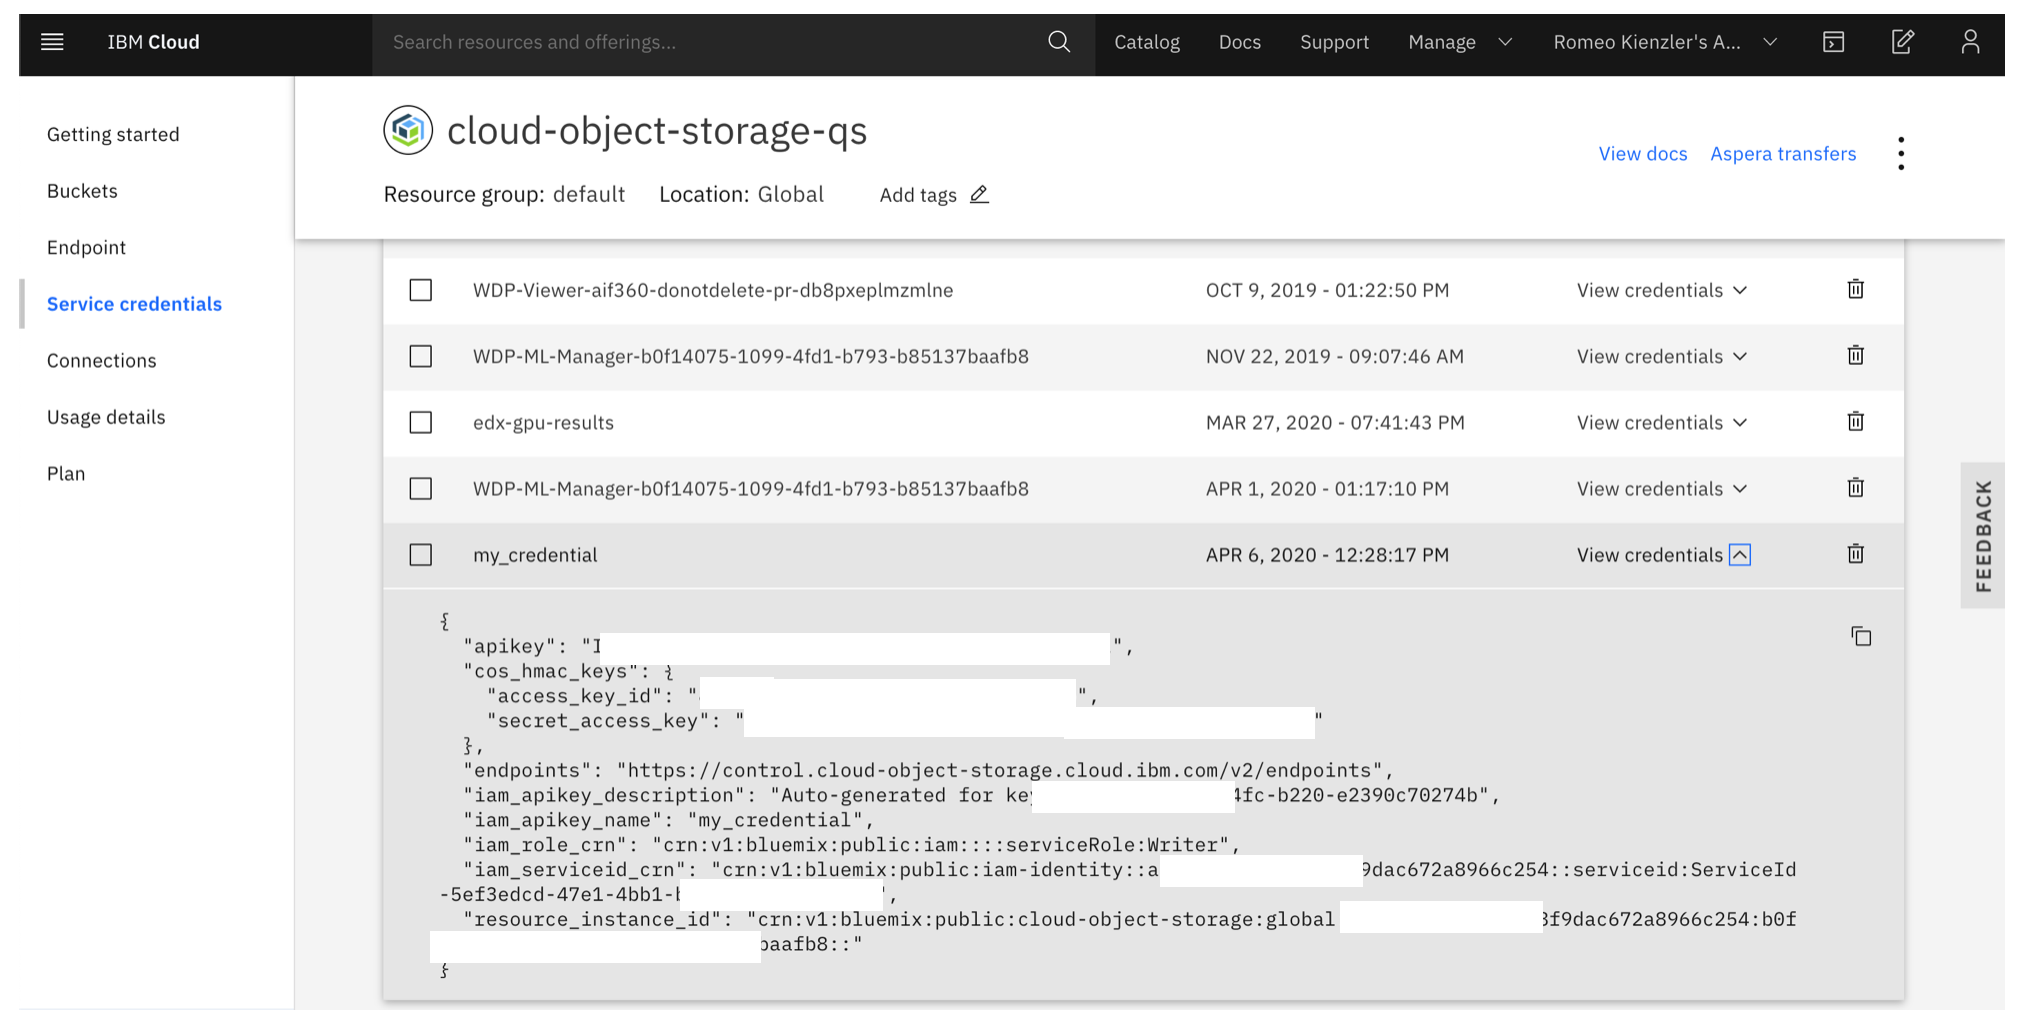



In [ ]:
%%bash
s3_access_key_id="###YOUR_CODE_HERE###"
s3_secret_access_key="###YOUR_CODE_HERE###"

echo $s3_access_key_id > s3_access_key_id
echo $s3_secret_access_key > s3_secret_access_key

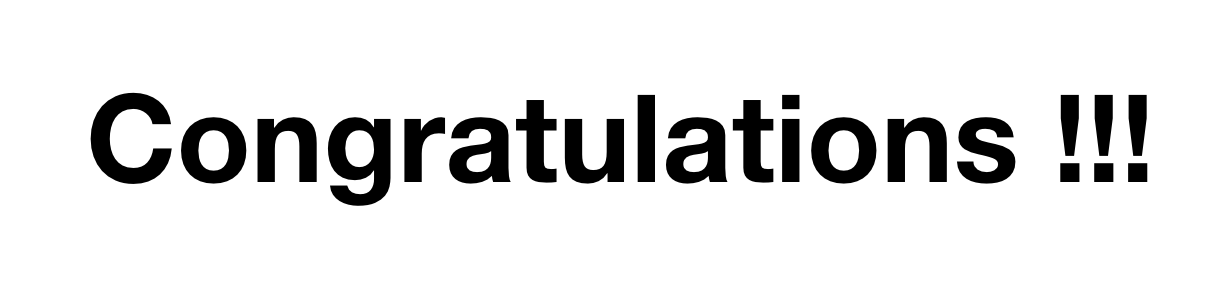
You've successfully setup this notebook. This was hard work, we know! Let's enjoy the rest of the code. Now it's time to implement the neural network training code. We just create a python string "code" which contains the code. Luckily, the training data is pulled from the internet automatically, so no further issues here:

In [49]:
code = """
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu
from tensorflow.nn import softmax
from time import time

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0
    
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

start = time()
model.fit(train_images, train_labels, epochs=5)
stop = time()
elapsed = stop - start
print('Elapsed time is %f seconds.'% elapsed) 

"""
text_file = open("keras_network.py", "w")
text_file.write(code)
text_file.close()

The code is writting to a file called "keras_network.py which we now zip into a file called keras-model.zip

In [35]:
!zip keras-model.zip keras_network.py

updating: keras_network.py (deflated 52%)


Now it's time to download and install the IBM Cloud command line tool

In [36]:
!wget https://clis.cloud.ibm.com/download/bluemix-cli/1.0.0/linux64/archive && tar xvfz archive

--2020-04-03 14:54:04--  https://clis.cloud.ibm.com/download/bluemix-cli/1.0.0/linux64/archive
Resolving clis.cloud.ibm.com (clis.cloud.ibm.com)... 169.46.89.151, 169.62.254.80, 169.47.124.23
Connecting to clis.cloud.ibm.com (clis.cloud.ibm.com)|169.46.89.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.dhe.ibm.com/cloud/bluemix/cli/bluemix-cli/1.0.0/binaries/IBM_Cloud_CLI_1.0.0_linux_amd64.tgz [following]
--2020-04-03 14:54:04--  https://public.dhe.ibm.com/cloud/bluemix/cli/bluemix-cli/1.0.0/binaries/IBM_Cloud_CLI_1.0.0_linux_amd64.tgz
Resolving public.dhe.ibm.com (public.dhe.ibm.com)... 129.35.224.112
Connecting to public.dhe.ibm.com (public.dhe.ibm.com)|129.35.224.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16026729 (15M) [application/x-tar]
Saving to: ‘archive.2’

100%[======================================>] 16,026,729  1.83MB/s   in 9.2s   

2020-04-03 14:54:14 (1.65 MB/s) - ‘archive.2’ saved [1602

Into the tooling we install the IBM Watson Machine Learning plugin

In [37]:
!./IBM_Cloud_CLI/ibmcloud plugin install -f machine-learning

Looking up 'machine-learning' from repository 'IBM Cloud'...
Plug-in 'machine-learning 3.0.2' found in repository 'IBM Cloud'
Attempting to download the binary file...
 19.14 MiB / 19.14 MiB [===========================================] 100.00% 11s
20071911 bytes downloaded
Installing binary...
OK
Plug-in 'machine-learning 3.0.2' was successfully installed into /home/dsxuser/.bluemix/plugins/machine-learning. Use './IBM_Cloud_CLI/ibmcloud plugin show machine-learning' to show its details.


Now your hard work from before pays off. You can use the IBM Cloud command line tool to login to IBM Cloud. You should see someling like this:

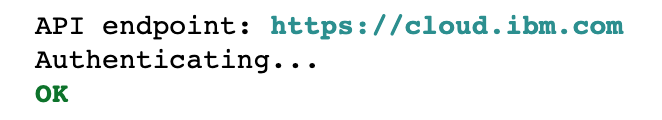

If not, most likely your credentials you've obtained above are wrong.

In [50]:
!./IBM_Cloud_CLI/ibmcloud login --apikey `cat apikey` -c `cat account` -r `cat region`
!./IBM_Cloud_CLI/ibmcloud target -o `cat organization` -s `cat space`

API endpoint: https://cloud.ibm.com
Authenticating...
OK

Targeted account Romeo Kienzler's Account (4b5f219cdaee498f9dac672a8966c254)

Targeted region us-south

                      
API endpoint:      https://cloud.ibm.com   
Region:            us-south   
User:              romeo.kienzler@ch.ibm.com   
Account:           Romeo Kienzler's Account (4b5f219cdaee498f9dac672a8966c254)   
Resource group:    No resource group targeted, use './IBM_Cloud_CLI/ibmcloud target -g RESOURCE_GROUP'   
CF API endpoint:      
Org:                  
Space:                
Targeted Cloud Foundry (https://api.us-south.cf.cloud.ibm.com)

Targeted org romeo.kienzler@ch.ibm.com

Targeted space dev


                      
API endpoint:      https://cloud.ibm.com   
Region:            us-south   
User:              romeo.kienzler@ch.ibm.com   
Account:           Romeo Kienzler's Account (4b5f219cdaee498f9dac672a8966c254)   
Resource group:    No resource group targeted, use './IBM_Cloud_CLI/ibmcloud targe

Now you need to create a "Watson Machine Learning " service in the IBM Cloud. There is a "Lite" plan available. So please open this link and click on "Create"

https://cloud.ibm.com/catalog/services/machine-learning

Please note that there is only one service allowed per "Lite" account, but this is not a problem. In case you've already created a service, the code below will just use the existing one.

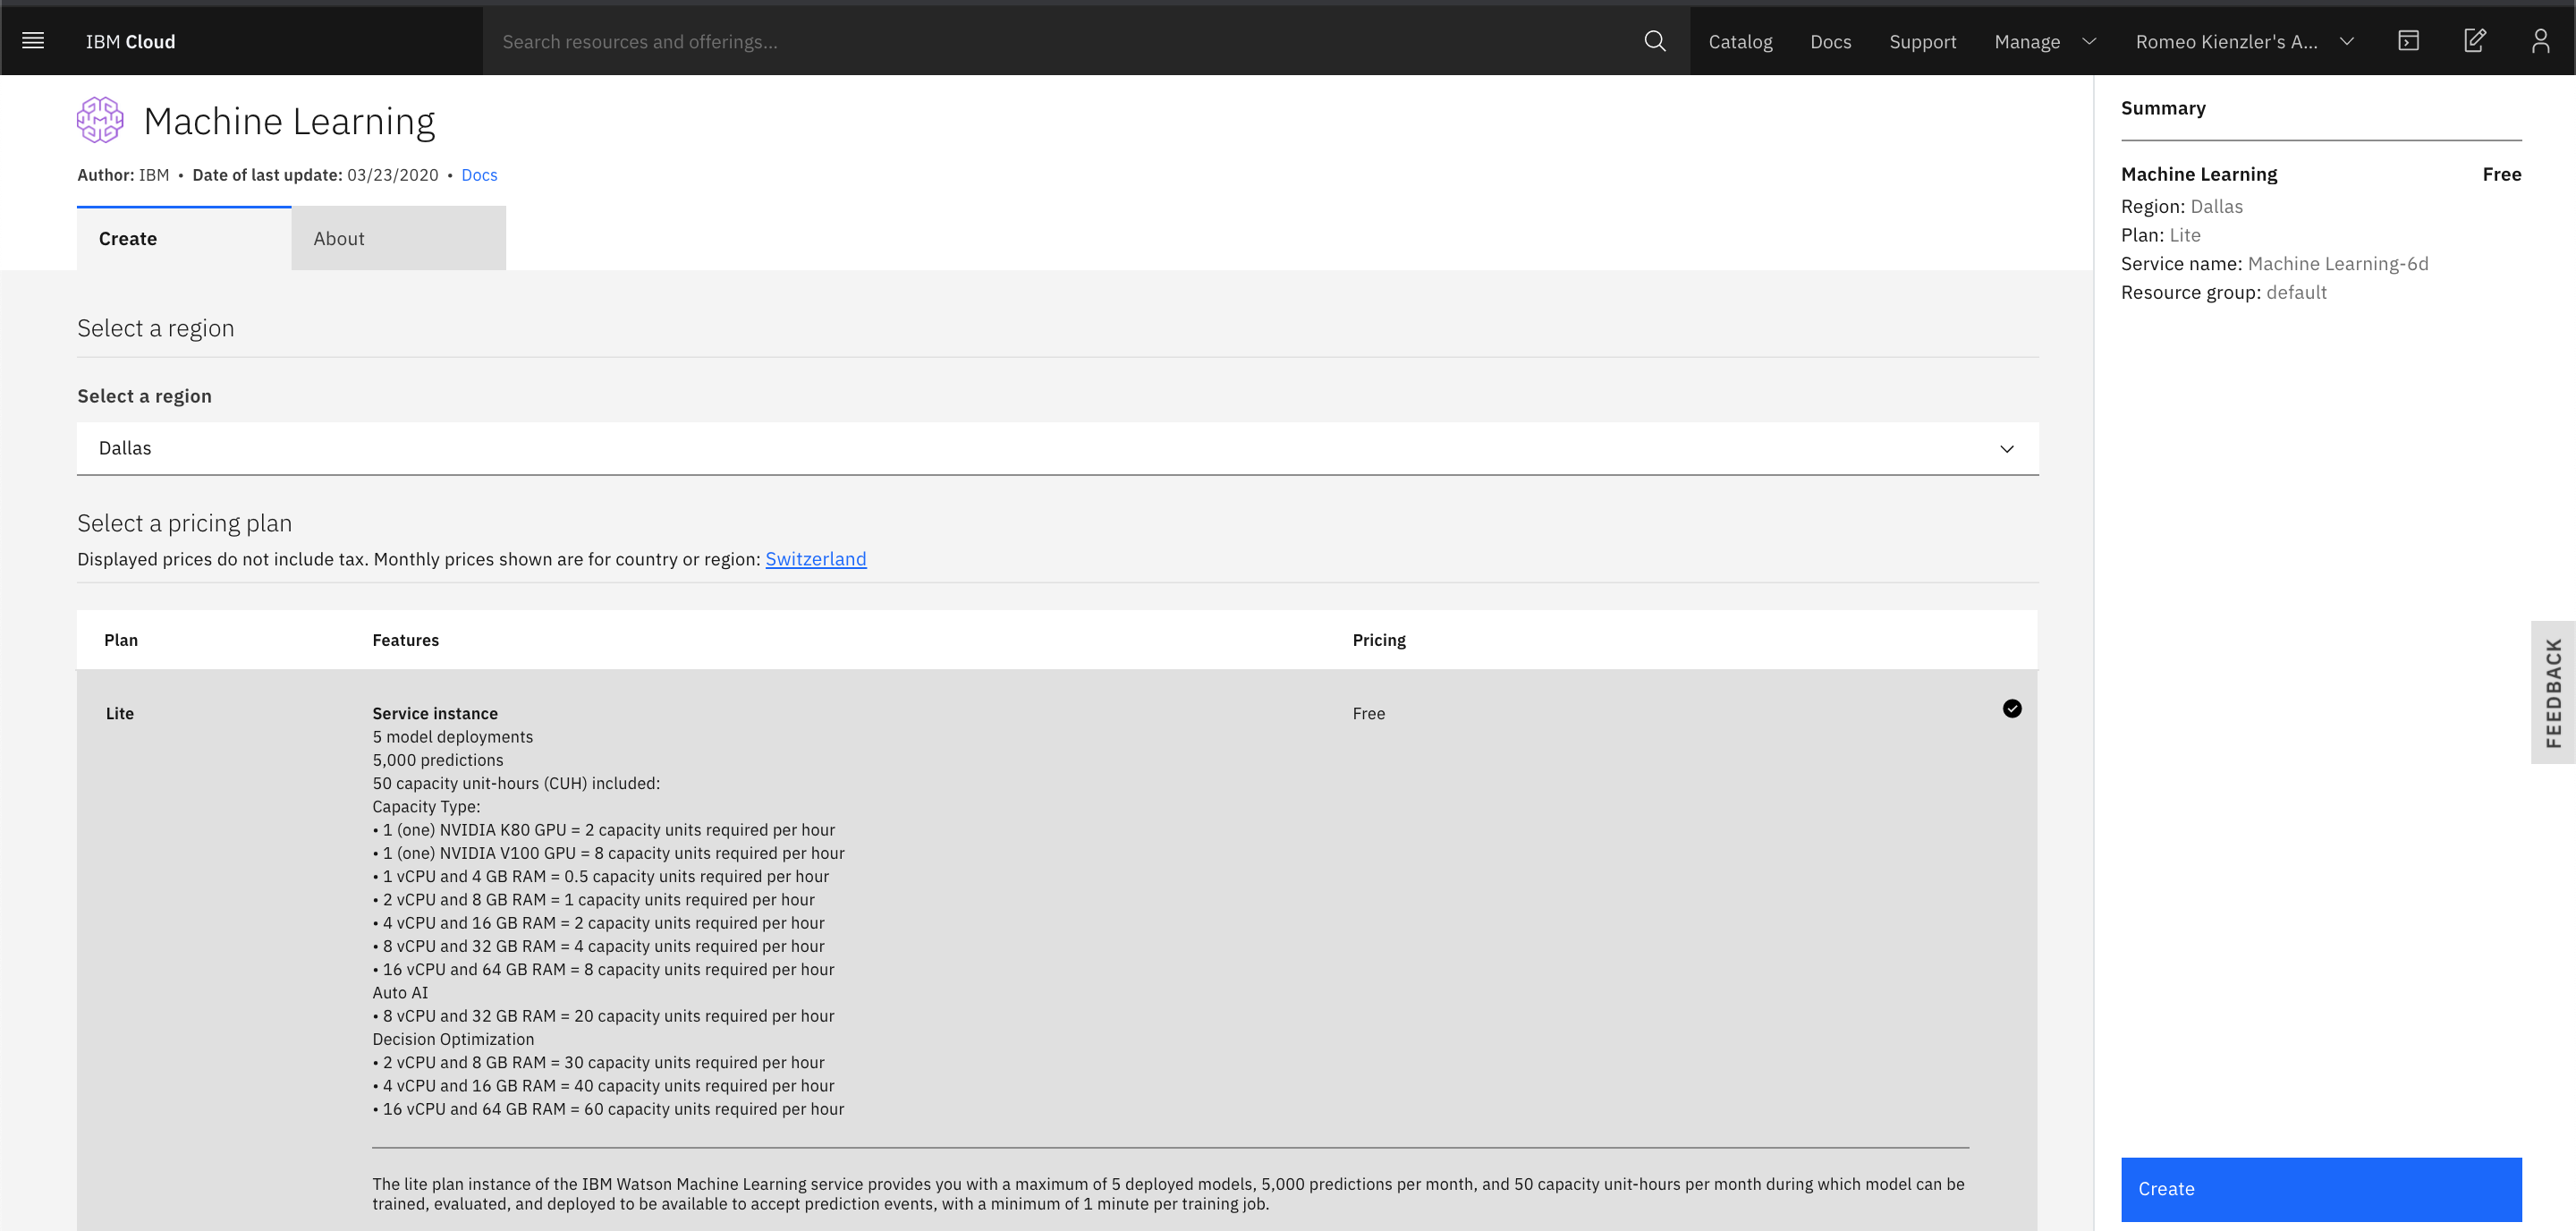

In [39]:
!./IBM_Cloud_CLI/ibmcloud ml list instances | tee out

Fetching instances list for Prod 
SI No   GUID   Instance Name   
Fetching instances list for Prod  successful

0 records found.
OK
List Instances successful


In [40]:
%%bash
found_instance=`cat out |grep "1 records found" |wc -l`
if [ $found_instance -eq 1 ]; then
    instance_guid=`cat out |grep "Machine Learning"|awk '{print $2}'`
    echo "Found Instance: $instance_guid"
    echo $instance_guid > instance_guid
else
    echo "Didn't find a Watson Machine Learning instance in your cloud account, please add using this link: https://cloud.ibm.com/catalog/services/machine-learning"
fi

Didn't find a Watson Machine Learning instance in your cloud account, please add using this link: https://cloud.ibm.com/catalog/services/machine-learning


The code below will select your Watson Machine Learning service to be used. In case there is more than one, you need to set the ID manually, if you haven't created one, please do so as described above.

In [41]:
!./IBM_Cloud_CLI/ibmcloud ml set instance `cat instance_guid`

Instance-ID:	ea4e01b9-9671-4445-8b49-d5d6404f48eb
URL: 		https://us-south.ml.cloud.ibm.com
OK
Set Instance successful


Before we can submit a training job to the Watson Machine Learning service we need to create a configuratoin YAML file. This is done for you below. Please note that we are using the nVidia K80 Tesla GPU card for training since usage of this card is free of charge. But again, don't worry, if you are in a Lite accout you didn't give away your credit card, so you won't be charged anyway. In case you have a paid IBM Cloud account, you can change "k80" to "v100" and train you model on the newest generation of nVidia's Tesla cards.

In [42]:
account = open('account', 'r').read().replace('\n', '')
s3_bucket = open('s3_bucket', 'r').read().replace('\n', '')
s3_endpoint_url = open('s3_endpoint_url', 'r').read().replace('\n', '')
s3_access_key_id = open('s3_access_key_id', 'r').read().replace('\n', '')
s3_secret_access_key = open('s3_secret_access_key', 'r').read().replace('\n', '')


s = """
model_definition:
  name: tf-mnist-showtest1
  author:
    name: DL Developer
    email: "%s"
  description: Simple MNIST model implemented in TF-Keras
  framework:
    name: tensorflow
    version: "1.15"
    runtimes: 
      name: python
      version: "3.6"
  execution:
    command: python3 keras_network.py
    compute_configuration:
      name: k80
training_data_reference:
  name: training_data_reference_name
  connection:
    endpoint_url: "%s"
    access_key_id: "%s"
    secret_access_key: "%s"
  source:
    bucket: %s
  type: s3
training_results_reference:
  name: training_results_reference_name
  connection:
    endpoint_url: "%s"
    access_key_id: "%s"
    secret_access_key: "%s"
  target:
    bucket: %s
  type: s3

""" % (account,s3_endpoint_url,s3_access_key_id,s3_secret_access_key,s3_bucket,s3_endpoint_url,s3_access_key_id,s3_secret_access_key,s3_bucket)
text_file = open("tf-train.yaml", "w")
text_file.write(s)
text_file.close()

Now it's time to submit the job

In [44]:
!./IBM_Cloud_CLI/ibmcloud ml train keras-model.zip tf-train.yaml

Starting to train ...
ff9b0686-9cb4-4301-b888-89fcb6926918 c3d52713-7ece-4838-9af0-f9438c9d1f44
OK
Model-ID is 'model-ypn5orci'


Please regularly execute the cell below to monitor your job. Once "status" changed from "pending" or "running" to completed, we can check on the results in Cloud Object Store.

In [51]:
!./IBM_Cloud_CLI/ibmcloud ml list training-runs

Fetching the list of training runs ...
SI No   Name                                  guid             status      framework    version   submitted-at   
1       python-client-tutorial_training-run   model-n0n497y6   error       tensorflow   1.15.0    2020-03-27T17:48:23.784Z   
2       python-client-tutorial_training-run   model-m4aw2ghj   error       tensorflow   1.15      2020-03-27T17:48:46.182Z   
3       python-client-tutorial_training-run   model-fcsy6b08   error       tensorflow   1.15      2020-03-27T17:49:52.578Z   
4       python-client-tutorial_training-run   model-8bnjhld9   error       tensorflow   1.15      2020-03-27T18:49:26.798Z   
5       python-client-tutorial_training-run   model-4dqcc9p1   error       tensorflow   1.15      2020-03-27T18:50:24.287Z   
6       python-client-tutorial_training-run   model-nraip4h4   error       tensorflow   1.15      2020-03-27T18:58:50.160Z   
7       python-client-tutorial_training-run   model-k9rxql7f   error       tensorflow   1.1

Please open your bucket again in the IBM Cloud Object Store admin interface. Please find the "training-log.txt" file.

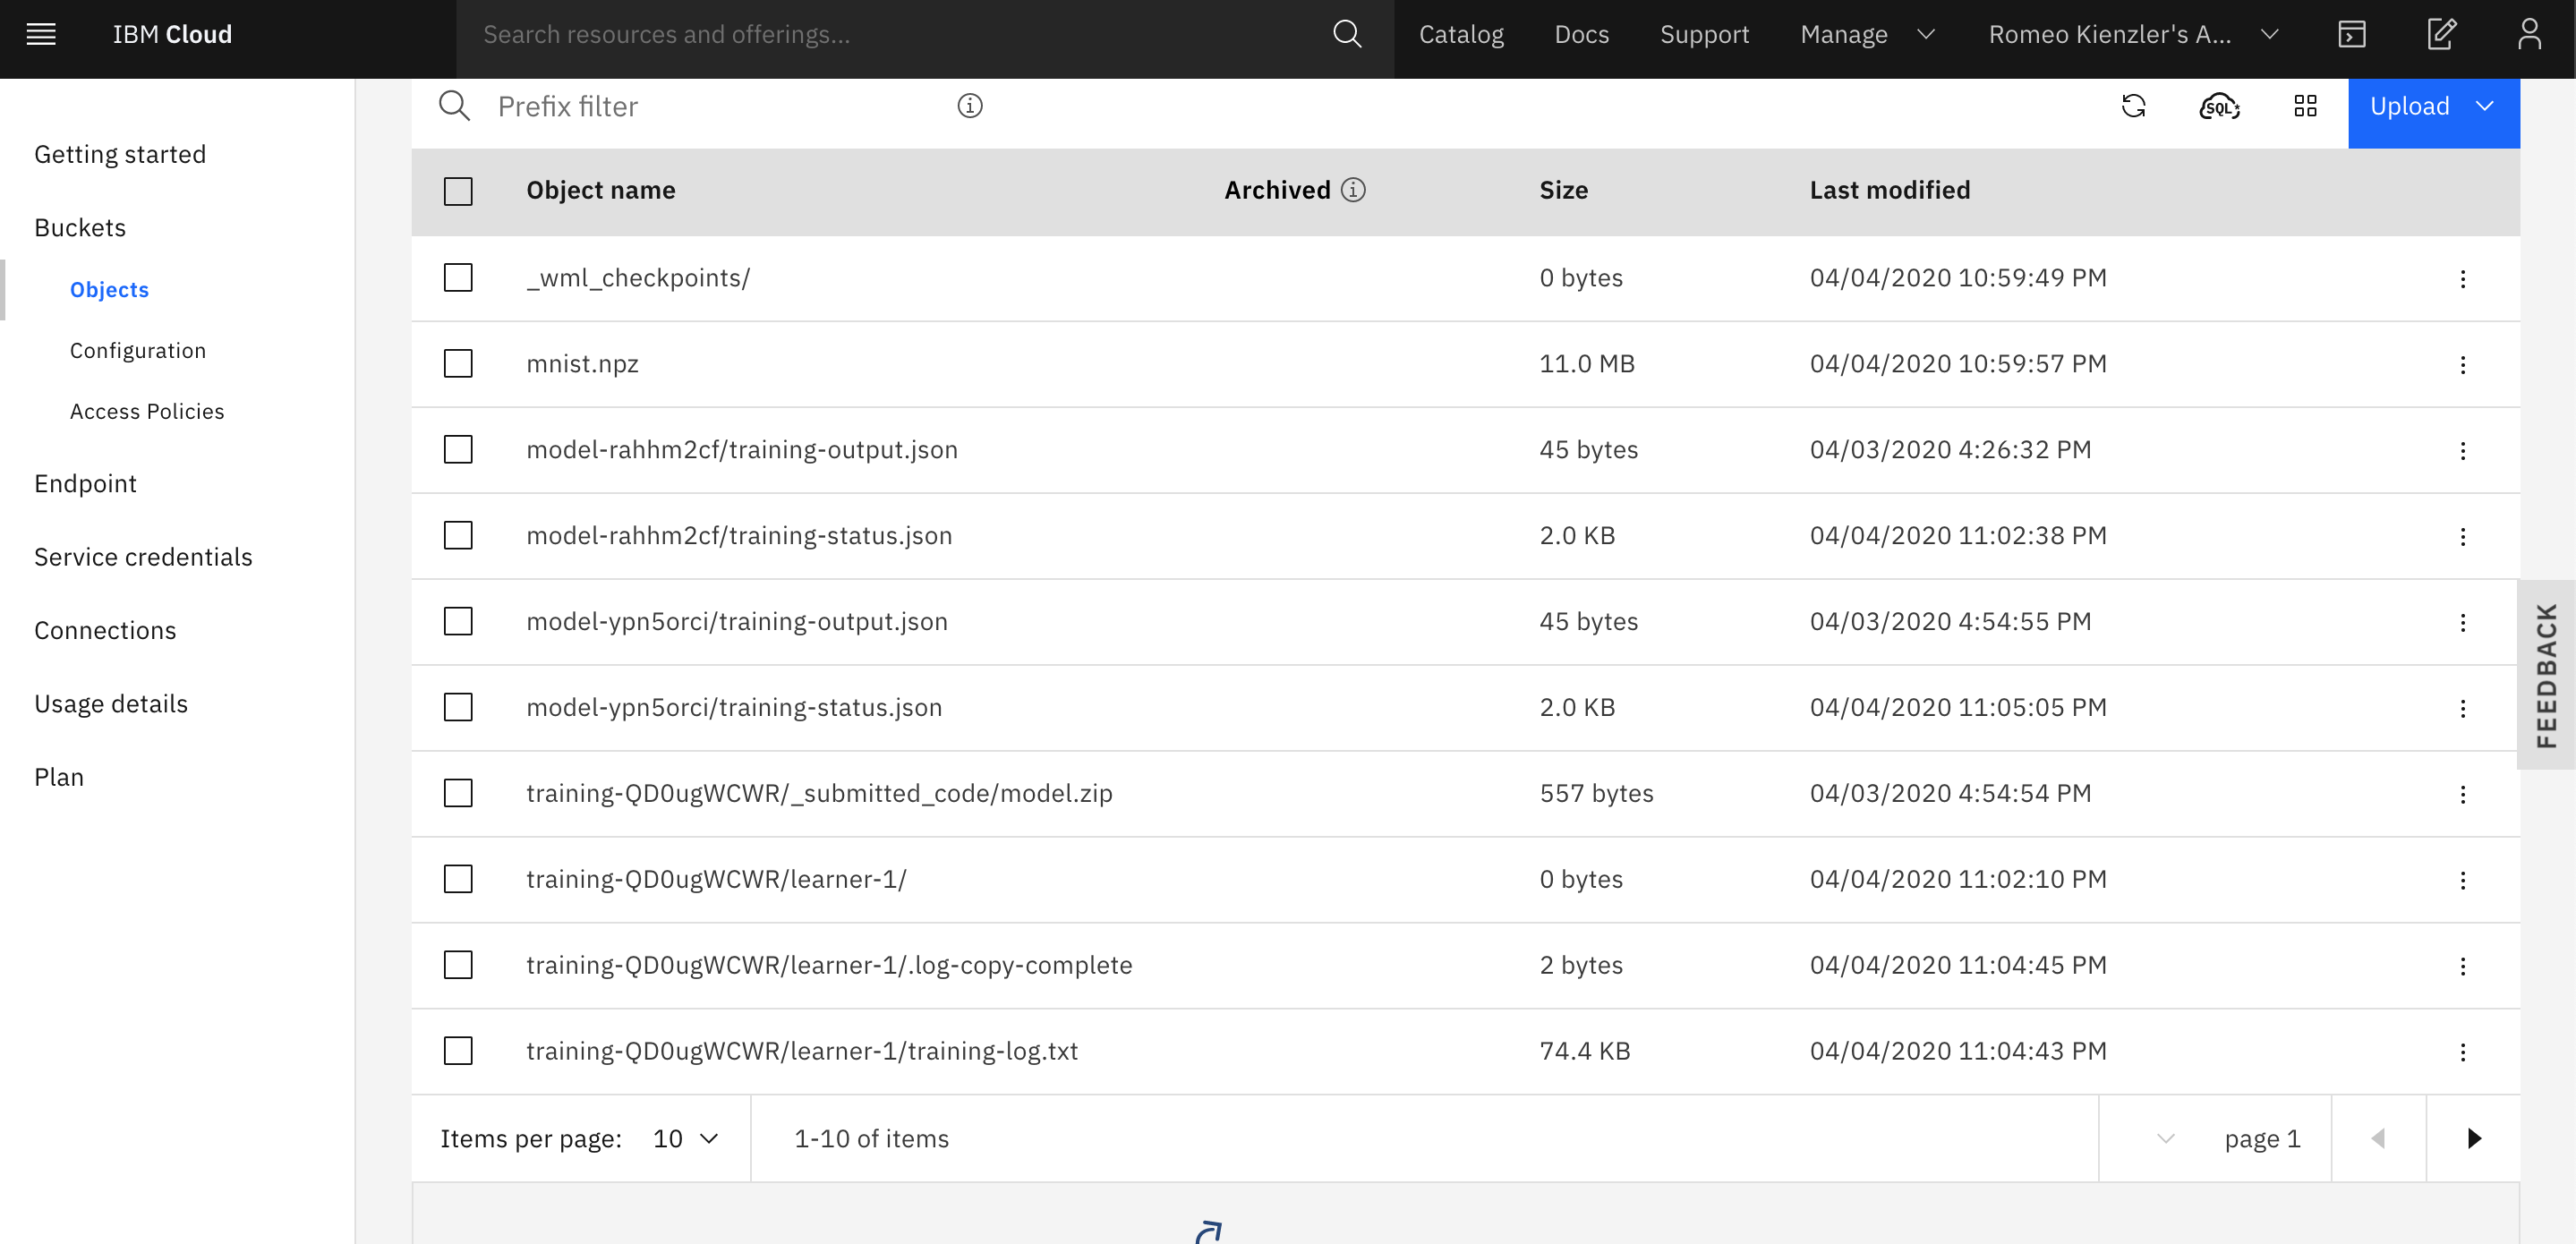

Please select it by ticking the check box left to it and then click on "Download objects". Please submit this file to the grading system for peer assesment.

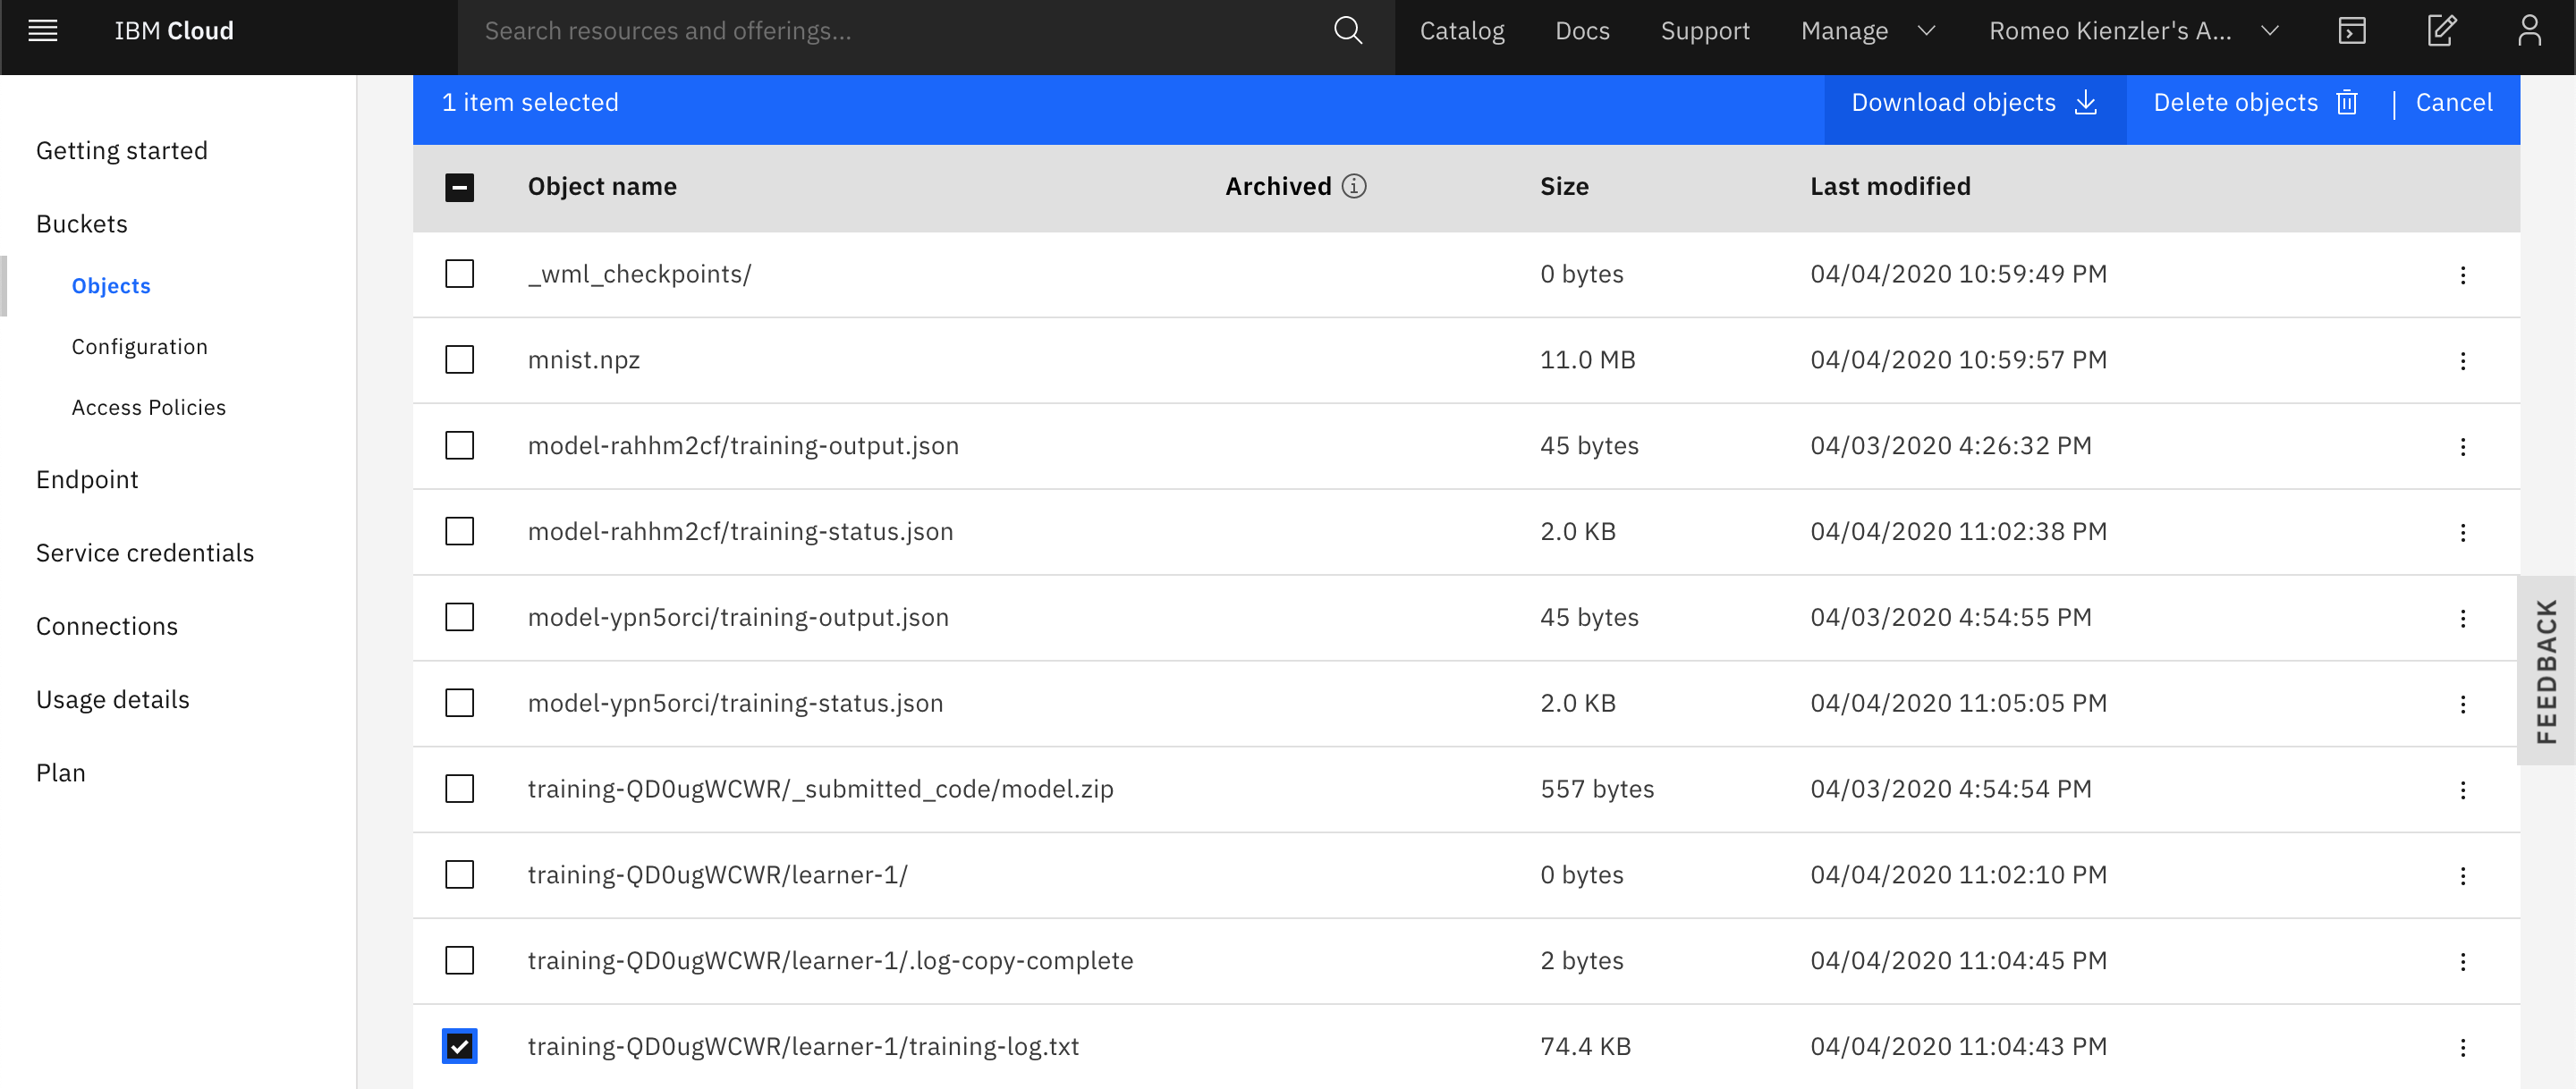

This concludes the assignment.